# Making new phosim repackager 


Repackage amp images  - PROGRAM OUTLINE 
    
    class PhoSimRepackager
    __init__ 
    self.controller =  'H'
    self.telcode = 'MC'
    
    def process_visit ( visit_dir, out_dir=None, prefix='lsst', verbose=False )
        
        checks for input files
        iterates over sensors
            calls repackage_corner or repackage_main depending on sensor names
            
        def repackage_corner( phosim_amp_files, camera, out_dir='.')
            reads the amp files for a given sensor
            packages amps into fits separate for intra/extra focal 
            adds header info for main header and amp headers
            flips intra-focal channels up-down
            creates filename from TELCODE, CONTRLLR (__init__),
                                  DAYOBS (from converting phosim MJD-OBS header), 
                                  SEQNUM (a random number) , raft (from input filename), 
                                  ccdslot (whether SW0 or SW1) 
            saves the file 

        def repackage_main( phosim_amp_files, camera, out_dir='.')
            reads the amp files for a given sensor
            packages all amps into one file 
            adds header info for main header and amp headers 
            flips 00:07 channels channels left-right 
            creates filename from TELCODE, CONTRLLR (__init__),
                                  DAYOBS (from converting phosim MJD-OBS header), 
                                  SEQNUM (a random number) , raft&ccdslot (from input filename), 
                             
            saves the file 

    
    def process_visit_eimage( visit_dir, out_dir=None, prefix='lsst', verbose=False ) 
                             
        checks for input files
        iterates over sensors
            calls repackage_eimage_corner or repackage_eimage_main depending on sensor names
                             
                            
        def repackage_eimage_corner (phosim_eimg_file, camera , out_dir='.')
            reads the eimage fits file (single HDU)
            adds appropriate header info for main header
            creates filename from TELCODE, CONTRLLR (__init__),
                                  DAYOBS (from converting phosim MJD-OBS header), 
                                  SEQNUM (a random number) , raft (from input filename), 
                                  ccdslot (whether SW0 or SW1) 
            saves the file 
                             
        def repackage_eimage_main ( phosim_eimg_file, camera , out_dir='.' )
                             
            reads the eimage fits file (single HDU)
            adds appropriate header info for main header
            creates filename from TELCODE, CONTRLLR (__init__),
                                  DAYOBS (from converting phosim MJD-OBS header), 
                                  SEQNUM (a random number) , raft & ccdslot  (from input filename), 
                               
            saves the file 

In [1]:
import os 
import re 

In [12]:
#visit_dir = '/project/scichris/repackagerTest/extraRpkgdAmpEimg/'
visit_dir = '/project/scichris/aos/results_comcam/iter0/img/extra/'
# this solution is dfrom 
# https://stackoverflow.com/questions/13031989/regular-expression-usage-in-glob-glob-for-python 
def glob_re(pattern, strings):
    return list(filter(re.compile(pattern).match, strings))

pattern = r'^((?!_e).)*fits$'
#filenames = glob_re(r'.*(abc|123|a1b).*\.txt', os.listdir())
filenames = glob_re(r'^((?!_e).)*fits$', os.listdir(visit_dir))



In [13]:
filenames

['MC_H_20211231_006001_R22_S01.fits',
 'MC_H_20211231_006001_R22_S12.fits',
 'MC_H_20211231_006001_R22_S21.fits',
 'MC_H_20211231_006001_R22_S02.fits',
 'MC_H_20211231_006001_R22_S10.fits',
 'MC_H_20211231_006001_R22_S11.fits',
 'MC_H_20211231_006001_R22_S20.fits',
 'MC_H_20211231_006001_R22_S00.fits',
 'MC_H_20211231_006001_R22_S22.fits']

In [16]:
rawExpDir = visit_dir
ampFiles =  filenames
rawImgFiles = " "
for ampFile in ampFiles:
    rawImgFiles += ' %s'%os.path.join(rawExpDir, ampFile)

In [17]:
rawImgFiles

'  /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S01.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S12.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S21.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S02.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S10.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S11.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S20.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S00.fits /project/scichris/aos/results_comcam/iter0/img/extra/MC_H_20211231_006001_R22_S22.fits'

In [19]:
# a one-liner to do that 
amp_files = list(filter(re.compile(r'^((?!_e).)*fits$').match, os.listdir(visit_dir)))
print(amp_files)

['MC_H_20000217_000032_R22_S01.fits', 'MC_H_20000217_000032_R22_S21.fits', 'MC_H_20000217_000032_R22_S00.fits', 'MC_H_20000217_000032_R22_S10.fits', 'MC_H_20000217_000032_R22_S02.fits', 'MC_H_20000217_000032_R22_S12.fits', 'MC_H_20000217_000032_R22_S11.fits', 'MC_H_20000217_000032_R22_S22.fits', 'MC_H_20000217_000032_R22_S20.fits']


In [18]:
os.listdir(visit_dir)

['MC_H_20000217_000032_R22_S01.fits',
 'MC_H_20000217_006001_R22_S21_e.fits',
 'MC_H_20000217_000032_R22_S21.fits',
 'MC_H_20000217_000032_R22_S00.fits',
 'centroid_lsst_e_9006001_f1_R22_S12_E000.txt',
 'MC_H_20000217_006001_R22_S22_e.fits',
 'centroid_lsst_e_9006001_f1_R22_S20_E000.txt',
 'centroid_lsst_e_9006001_f1_R22_S02_E000.txt',
 'MC_H_20000217_006001_R22_S00_e.fits',
 'centroid_lsst_e_9006001_f1_R22_S00_E000.txt',
 'MC_H_20000217_000032_R22_S10.fits',
 'MC_H_20000217_006001_R22_S01_e.fits',
 'centroid_lsst_e_9006001_f1_R22_S10_E000.txt',
 'centroid_lsst_e_9006001_f1_R22_S11_E000.txt',
 'MC_H_20000217_000032_R22_S02.fits',
 'MC_H_20000217_000032_R22_S12.fits',
 'MC_H_20000217_006001_R22_S10_e.fits',
 'MC_H_20000217_000032_R22_S11.fits',
 'MC_H_20000217_000032_R22_S22.fits',
 'MC_H_20000217_006001_R22_S02_e.fits',
 'MC_H_20000217_006001_R22_S11_e.fits',
 'MC_H_20000217_000032_R22_S20.fits',
 'MC_H_20000217_006001_R22_S20_e.fits',
 'centroid_lsst_e_9006001_f1_R22_S21_E000.txt',
 '

In [8]:

a = filter(re.compile(pattern).match, os.listdir(visit_dir))
a

In [46]:
import os
import sys
import glob
import time
from collections import defaultdict
import astropy.io.fits as fits
import astropy.time
from lsst.obs.lsst import LsstCam


def noao_section_keyword(bbox, flipx=False, flipy=False):
    """
    Convert bounding boxes into NOAO section keywords.
    Parameters
    ----------
    bbox : lsst.afw.geom.Box2I
        Bounding box.
    flipx : bool
        Flag to indicate that data should be flipped in the x-direction.
    flipy : bool
        Flag to indicate that data should be flipped in the y-direction.
    """
    xmin, xmax = bbox.getMinX()+1, bbox.getMaxX()+1
    ymin, ymax = bbox.getMinY()+1, bbox.getMaxY()+1
    if flipx:
        xmin, xmax = xmax, xmin
    if flipy:
        ymin, ymax = ymax, ymin
    return '[%i:%i,%i:%i]' % (xmin, xmax, ymin, ymax)

# 1) read all raw phosim output files to a dictionary 
visit_dir  = '/project/scichris/repackagerTest/extra//'
prefix='lsst'


# this is fine : phosim names are unchanged.... 
phosim_amp_files \
    = sorted(glob.glob(os.path.join(visit_dir, f'{prefix}_a_*')))

amp_files = defaultdict(list)
for item in phosim_amp_files:
    sensor_id = '_'.join(os.path.basename(item).split('_')[4:6])
    amp_files[sensor_id].append(item)
    
out_dir = '.'
if out_dir is None:
    tokens = os.path.basename(phosim_amp_files[0]).split('_')
    out_dir = 'v%07i-%s' % (int(tokens[2]), 'ugrizy'[int(tokens[3][1])])
    print(out_dir)
    
# 2) For each sensor, repackage amplifiers into a new fits file ... 

# Need following functions (same order )

# process_visit(, visit_dir, out_dir=None, prefix='lsst', )
# - provide a list of all phosim files in directory as a dictionary , key corresponds to sensor, eg. amp_files['R00_S22'] , sensor_id comes from phosim filename,
# it is fine - we can't from phosim name tell which files are intra and which extra-focal for corner sensors...
# - call a repackaging function for each sensor,  eg.  R00_S22,   R22_S00, etc... 


# repackage_main(amp_files[sensor_id], out_dir=out_dir, camera ) : 
# - repackaging a collection of amplifier files for each sensor 
# - need to handle separately main raft, where the current phosim channel mapping is fine , 
# and corner raft, where different mapping must be in place. 

# detector =  camera.get(sensor_id) # needs to be 
# repackage_corner(amp_files[sensor_id], sensor_id,  out_dir ,  camera )
# 

######
# single detector 
##### 


def repackage_corner(phosim_amp_files, camera, out_dir='.' ):
    
    # SW1  
    ch_map_intra = {'00':'17',
                  '01':'16',
                  '02':'15',
                  '03':'14',
                  '04':'13',
                  '05':'12',
                  '06':'11',
                  '07':'10',}

    # SW0 
    ch_map_extra = {
                  '10':'17',
                  '11':'16',
                  '12':'15',
                  '13':'14',
                  '14':'13',
                  '15':'12',
                  '16':'11',
                  '17':'10' }
    
    # read the intra and extra- amps into segments that will be 
    # assembled into a fits file 
    segmentsIntra = {}
    segmentsExtra = {}

    for filename in phosim_amp_files : 
        phosim_channel = os.path.basename(filename).split('_')[6][1:]

        if phosim_channel in ch_map_intra.keys() :   # one of 00,  01,  02,  03 ...
            segmentsIntra[ch_map_intra[phosim_channel]] = fits.open(filename)[0]

        elif phosim_channel in ch_map_extra.keys() :   # one of 10, 11, 12, 13, 14 ... 
            segmentsExtra[ch_map_extra[phosim_channel]] = fits.open(filename)[0]

    # read raft from the last file, they are all from the same raft 
    raft = os.path.basename(filename).split('_')[4]
    print('Repackaging sensor %s'%raft)  # eg. R00_S22 ...

    TELCODE, CONTRLLR, SEQNUM = 'MC', 'P', 32  # define here or elsewhere...

    # for SEQNUM , the OBSID header from phosim is too long, 
    # initially being 7-digit number... 
    # But if there is no systematic way of defining it
    # (random number is not very systematic),
    
    # # this generates a random integer number between 0 and 1e6
    # # self.seqnum = np.random.randint(0, 1e6, 1)[0]  # any 6-digit number would do 000031
    
    # then I can't predict the name of the output filename 
    # for  test_phosim_repackager.py ... 
    # I eventually opted to take 
    # the last 6 digits of OBSID, eg. 006001 as SEQNUM,
    # so that from lsst_e_9006001_f1_R22_S00_E000.fits
    # with MJD-OBS corresponding to OBSDATE of 20211231, 
    # we make MC_H_20211231_006001_R22_S00.fits
      
    # Tim Jennes says CONTRLLR P seems better, but then need to change the 
    # exposure_id calculation 

    ####
    # make  an intra-focal fits 
    ###
    for ccdslot, segments in zip(['SW1', 'SW0'],
                             [segmentsIntra, segmentsExtra]
                             ):
        print('\n',ccdslot, segments.keys())

        # initialize the FITS file 
        sensor = fits.HDUList(fits.PrimaryHDU())
        # NB: in the future, SW0 here would be part, as 
        # soon as lsstCam amp names get fixed from 01:07 to 10:17 ... 
        sensorId = '%s_%s'%(raft, ccdslot)  # eg. R00_SW1

        print('Using amp info for %s'%sensorId)
        detectors = camera.get(sensorId) # eg.  camera.get('R00_SW1')

        # iterate over amps 
        # set amp headers... 
        for amp in detectors :  # or
            ampName = amp.getName()[1:]
            print(ampName)
            hdu = segments[ampName]
            hdu.header['EXTNAME'] = 'Segment%s' % ampName
            hdu.header['DATASEC'] = noao_section_keyword(amp.getRawDataBBox())
            hdu.header['DETSEC'] \
                    = noao_section_keyword(amp.getBBox(),
                                           flipx=amp.getRawFlipX(),
                                           flipy=amp.getRawFlipY())
            
            #flip up-down the intra images for correct orientation 
            if ccdslot == 'SW1':
                print('Flipping up-down..')
                data = np.copy(hdu.data)
                hdu.data[:] = np.flipud(data)
                
            # Remove the incorrect BIASSEC keyword that phosim writes.
            try:
                hdu.header.remove('BIASSEC')
            except KeyError:
                pass
            sensor.append(hdu)


        # Set keywords in primary HDU, extracting most of the relevant
        # ones from the first phosim amplifier file.
        chip_id = sensor[1].header['CHIPID']

        sensor[0].header['EXPTIME'] = sensor[1].header['EXPTIME']   # ok 
        sensor[0].header['DARKTIME'] = sensor[1].header['DARKTIME'] # ok 
        sensor[0].header['RUNNUM'] = sensor[1].header['OBSID'] # ok 
        sensor[0].header['MJD-OBS'] = sensor[1].header['MJD-OBS'] # ok 
        DATEOBS = astropy.time.Time(sensor[1].header['MJD-OBS'], format='mjd').isot
        sensor[0].header['DATE-OBS']= DATEOBS # ok 
        YEAR, MONTH, DAYTIME= DATEOBS.split('-')
        DAY=DAYTIME[:2]
        DAYOBS = '%s%s%s'%(YEAR,MONTH,DAY)
        sensor[0].header['DAYOBS'] = DAYOBS

        DATE = sensor[1].header['DATE']
        sensor[0].header['DATE'] =  DATE #file creation date 
        sensor[0].header['MJD'] =  astropy.time.Time(DATE, format='isot').mjd # file creation date as mjd 

        sensor[0].header['FILTER'] = sensor[1].header['FILTER']   #  ? 

        serial = detectors.getSerial() # eg. ITL-4400B-029
        CCD_MANU,CCD_TYPE,CCD_NUM = serial.split('-') 
        sensor[0].header['LSST_NUM'] = serial 
        sensor[0].header['CCD_MANU'] = CCD_MANU # eg. ITL
        sensor[0].header['CCD_TYPE'] = CCD_TYPE  # eg. 4400B

        # NB: here I get [1:4072,1:2000], whereas  BOT has '[1:4072,1:4000]' ... 
        sensor[0].header['DETSIZE'] = noao_section_keyword(detectors.getBBox()) 
        sensor[0].header['INSTRUME'] = 'lsstCam'
        sensor[0].header['TELESCOP'] = 'LSST'


        sensor[0].header['TELCODE'] = TELCODE  # eg. MC 
        sensor[0].header['CONTRLLR'] = CONTRLLR # eg. C 
        sensor[0].header['SEQNUM'] = SEQNUM # eg. 32 
        
        OBSID = "%s_%s_%s_%s"%(TELCODE, CONTRLLR, DAYOBS, str(SEQNUM).zfill(6))
        sensor[0].header['OBSID'] =   OBSID

        sensor[0].header['TESTTYPE'] = 'PHOSIM' # ? not one of BIAS, DARK, FE55, FLAT, LAMBDA, PERSISTENCE, SPOT, SFLAT_
        sensor[0].header['IMGTYPE'] = 'SKYEXP' # ? not one of BIAS, DARK, FE55, FLAT, FLAT_<lam>, SPOT, PPUMP

        #sensor[0].header['MONOWL'] = -1 # not in BOT 
        sensor[0].header['RAFTBAY'] = raft
        sensor[0].header['CCDSLOT'] = ccdslot
        # Add boresight pointing angles and rotskypos (angle of sky
        # relative to Camera coordinates) from which obs_obs_lsst can
        # infer the CCD-wide WCS. --> not needed since not in BOT ... 
        # note: the relevant headers in https://confluence.lsstcorp.org/pages/viewpage.action?spaceKey=SYSENG&title=ComCam+Header+Information+Topic+Mapping
        # and https://docushare.lsst.org/docushare/dsweb/Get/LSE-400 
        sensor[0].header['RASTART'] = sensor[1].header['RA_DEG']
        sensor[0].header['DECSTART'] = sensor[1].header['DEC_DEG']
        sensor[0].header['ROTSTART'] = sensor[1].header['ROTANG']
        
        sensor[0].header['RA'] = sensor[1].header['RA_DEG']
        sensor[0].header['DEC'] = sensor[1].header['DEC_DEG']
        sensor[0].header['ROTPA'] = sensor[1].header['ROTANG']
        sensor[0].header['ROTPOS'] = sensor[1].header['ROTANG']
        
        # get a filename from TELCODE, CONTRLLR,  DAYOBS, SEQNUM , raft, ccdslot  
        # MC_C_20200825_000032_R00_SW0.fits
        # OBSID already contains TELCODE, CONTRLLR, DAYOBS, str(SEQNUM).zfill(6) - see above 
        filename = '%s_%s_%s.fits'%(OBSID,raft, ccdslot) 
        print('New filename: %s'%filename)
        filename = os.path.join(out_dir, filename)

        # save the FITS file 
        sensor.writeto(filename, overwrite=True)
        print('Saved as %s'%filename)
        
    return sensor # only for testing, in production should not return anything 
        



In [6]:
import os 
import glob 
visit_dir  = '/project/scichris/aos/results_lsstfam/iter0/img/intra/'
prefix='lsst'

# this is fine : phosim names are unchanged.... 
phosim_amp_files \
    = sorted(glob.glob(os.path.join(visit_dir, f'{prefix}_a_*')))


In [9]:
glob.glob?

Signature: glob.glob(pathname, *, recursive=False)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. However, unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns.

If recursive is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      /opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/glob.py
Type:      function


In [10]:
phosim_amp_filespy.io import fits
file = phosim_amp_files[0]
hdul = fits.open(file)[0]

In [14]:
hdul.header['OBSID']

'9006002'

In [49]:
from astropy.io import fits
hdul = fits.open('/project/scichris/dev/obs_lsst_dev/data/input/phosim/raw/204595/R11/00204595-R11-S20-det042.fits')

In [53]:
np.shape(hdul[1].data)

(2010, 522)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
np.where(hdul[1].data > 0)

(array([], dtype=int64), array([], dtype=int64))

(array([      0.,       0.,       0.,       0.,       0., 1049220.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

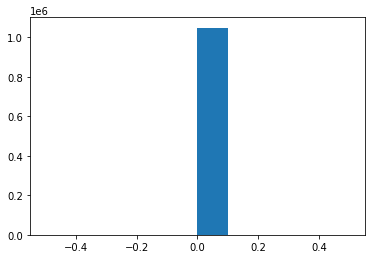

In [39]:
plt.hist(np.ravel(hdul[1].data))

In [57]:
# read in the phosim file, and save only the header ...
fname = '/project/scichris/repackagerTest/extraRpkgdAmp/MC_H_20000217_000032_R22_S00.fits'
hdul = fits.open(fname)
sensor  = fits.HDUList(fits.PrimaryHDU())
sensor.append(hdul[0])

save = '/project/scichris/dev/obs_lsst_dev/data/input/phosimLsstCam/raw/2000-02-17/MC_H_20000217_000032_R22_S00.fits'
sensor.writeto(save, overwrite=True)

In [43]:
#replace the content of the file with zeros to make it smaller ... 
fname = '/project/scichris/dev/obs_lsst_dev/data/input/phosimLsstCam/raw/2000-02-17/MC_H_20000217_000032_R22_S00.fits'
hdul = fits.open(fname)
for i in range(1,len(hdul)):
    hdul[i].data[:] = 0
hdul.writeto(fname, overwrite=True)

In [47]:
hdul = fits.open(fname)
np.where(hdul[3].data > 0)

(array([], dtype=int64), array([], dtype=int64))

In [55]:
sensor  = fits.HDUList(fits.PrimaryHDU())
sensor.append(hdul[0])

In [56]:
sensor.writeto(fname, overwrite=True)

In [40]:
# Make a repackage command that would work for the main camera: comcam or lsstfamcam
import numpy as np 

def repackage_main(phosim_amp_files, camera, out_dir='.' ):
    
    # this is the old channel map ...  
#     ch_map = {'00': '10',
#               '01': '11',
#               '02': '12',
#               '03': '13',
#               '04': '14',
#               '05': '15',
#               '06': '16',
#               '07': '17',
              
#               '17': '07',
#               '16': '06',
#               '15': '05',
#               '14': '04',
#               '13': '03',
#               '12': '02',
#               '11': '01',
#               '10': '00'}
    # this is different mapping : same unto same ! 
    # thus instead of using a mapping,  I 
    # use the phosim channels ... 
#     ch_map = {'00': '00',
#               '01': '01',
#               '02': '02',
#               '03': '03',
#               '04': '04',
#               '05': '05',
#               '06': '06',
#               '07': '07',
              
#               '17': '17',
#               '16': '16',
#               '15': '15',
#               '14': '14',
#               '13': '13',
#               '12': '12',
#               '11': '11',
#               '10': '10'}
    
    
    # read the amplifiers into segments that will be 
    # assembled into a fits file 
    segments = {}
    for filename in phosim_amp_files : 
        phosim_channel = os.path.basename(filename).split('_')[6][1:]
        segments[phosim_channel] = fits.open(filename)[0]

    # read raft from the last file, they are all from the same raft 
    raft = os.path.basename(filename).split('_')[4] # eg. R22
    ccdslot = os.path.basename(filename).split('_')[5] # eg. S00...
    print('Repackaging sensor %s'%raft)  # eg. R22
    
    TELCODE, CONTRLLR, SEQNUM = 'MC', 'H', 32  # define here or elsewhere...

    ####
    # make  the fits file  fits 
    ###
    
    print('\n',ccdslot, segments.keys())

    # initialize the FITS file 
    sensor = fits.HDUList(fits.PrimaryHDU())
    # NB: in the future, SW0 here would be part, as 
    # soon as lsstCam amp names get fixed from 01:07 to 10:17 ... 
    sensorId = '%s_%s'%(raft, ccdslot)  # eg. R00_SW1

    print('Using amp info for %s'%sensorId)
    detectors = camera.get(sensorId) # eg.  camera.get('R00_SW1')

    # iterate over amps 
    # set amp headers... 
    for amp in detectors :  # or
        ampName = amp.getName()[1:]
        #print(ampName)
        hdu = segments[ampName]
        hdu.header['EXTNAME'] = 'Segment%s' % ampName
        hdu.header['DATASEC'] = noao_section_keyword(amp.getRawDataBBox())
        hdu.header['DETSEC'] \
                = noao_section_keyword(amp.getBBox(),
                                       flipx = amp.getRawFlipX(), 
                                       flipy=amp.getRawFlipY())

        #flip up-down the intra images for correct orientation 
        if ampName in  ['00','01','02','03','04','05','06','07']:
            print('Flipping left-right..')
            data = np.copy(hdu.data)
            hdu.data[:] = np.fliplr(data)

        # Remove the incorrect BIASSEC keyword that phosim writes.
        try:
            hdu.header.remove('BIASSEC')
        except KeyError:
            pass
        sensor.append(hdu)


    # Set keywords in primary HDU, extracting most of the relevant
    # ones from the first phosim amplifier file.
    chip_id = sensor[1].header['CHIPID']

    sensor[0].header['EXPTIME'] = sensor[1].header['EXPTIME']   # ok 
    sensor[0].header['DARKTIME'] = sensor[1].header['DARKTIME'] # ok 
    sensor[0].header['RUNNUM'] = sensor[1].header['OBSID'] # ok 
    sensor[0].header['MJD-OBS'] = sensor[1].header['MJD-OBS'] # ok 
    DATEOBS = astropy.time.Time(sensor[1].header['MJD-OBS'], format='mjd').isot
    sensor[0].header['DATE-OBS']= DATEOBS # ok 
    YEAR, MONTH, DAYTIME= DATEOBS.split('-')
    DAY=DAYTIME[:2]
    DAYOBS = '%s%s%s'%(YEAR,MONTH,DAY)
    sensor[0].header['DAYOBS'] = DAYOBS

    DATE = sensor[1].header['DATE']
    sensor[0].header['DATE'] =  DATE #file creation date 
    sensor[0].header['MJD'] =  astropy.time.Time(DATE, format='isot').mjd # file creation date as mjd 

    sensor[0].header['FILTER'] = sensor[1].header['FILTER']   #  ? 

    serial = detectors.getSerial() # eg. ITL-4400B-029
    CCD_MANU,CCD_TYPE,CCD_NUM = serial.split('-') 
    sensor[0].header['LSST_NUM'] = serial 
    sensor[0].header['CCD_MANU'] = CCD_MANU # eg. ITL
    sensor[0].header['CCD_TYPE'] = CCD_TYPE  # eg. 4400B

    # NB: here I get [1:4072,1:2000], whereas  BOT has '[1:4072,1:4000]' ... 
    sensor[0].header['DETSIZE'] = noao_section_keyword(detectors.getBBox()) 
    sensor[0].header['INSTRUME'] = 'lsstCam'
    sensor[0].header['TELESCOP'] = 'LSST'


    sensor[0].header['TELCODE'] = TELCODE  # eg. MC 
    sensor[0].header['CONTRLLR'] = CONTRLLR # eg. C 
    sensor[0].header['SEQNUM'] = SEQNUM # eg. 32 

    OBSID = "%s_%s_%s_%s"%(TELCODE, CONTRLLR, DAYOBS, str(SEQNUM).zfill(6))
    sensor[0].header['OBSID'] =   OBSID

    sensor[0].header['TESTTYPE'] = 'PHOSIM' # ? not one of BIAS, DARK, FE55, FLAT, LAMBDA, PERSISTENCE, SPOT, SFLAT_
    sensor[0].header['IMGTYPE'] = 'SKYEXP' # ? not one of BIAS, DARK, FE55, FLAT, FLAT_<lam>, SPOT, PPUMP

    #sensor[0].header['MONOWL'] = -1 # not in BOT 
    sensor[0].header['RAFTBAY'] = raft
    sensor[0].header['CCDSLOT'] = ccdslot
    # Add boresight pointing angles and rotskypos (angle of sky
    # relative to Camera coordinates) from which obs_obs_lsst can
    # infer the CCD-wide WCS. --> not needed since not in BOT ... 
    # note: the relevant headers in https://confluence.lsstcorp.org/pages/viewpage.action?spaceKey=SYSENG&title=ComCam+Header+Information+Topic+Mapping
    # and https://docushare.lsst.org/docushare/dsweb/Get/LSE-400 
    sensor[0].header['RASTART'] = sensor[1].header['RA_DEG']
    sensor[0].header['DECSTART'] = sensor[1].header['DEC_DEG']
    sensor[0].header['ROTSTART'] = sensor[1].header['ROTANG']

    sensor[0].header['RA'] = sensor[1].header['RA_DEG']
    sensor[0].header['DEC'] = sensor[1].header['DEC_DEG']
    sensor[0].header['ROTPA'] = sensor[1].header['ROTANG']
    sensor[0].header['ROTPOS'] = sensor[1].header['ROTANG']

    # get a filename from TELCODE, CONTRLLR,  DAYOBS, SEQNUM , raft, ccdslot  
    # MC_C_20200825_000032_R00_SW0.fits
    # OBSID already contains TELCODE, CONTRLLR, DAYOBS, str(SEQNUM).zfill(6) - see above 
    filename = '%s_%s_%s.fits'%(OBSID,raft, ccdslot) 
    print('New filename: %s'%filename)
    filename = os.path.join(out_dir, filename)

    # save the FITS file 
    sensor.writeto(filename, overwrite=True)
    print('Saved as %s'%filename)

    return sensor # only for testing, in production should not return anything 
        

In [77]:
phosim_amp_file = phosim_amp_files[0]


In [78]:
hdul = fits.open(phosim_amp_file)

In [79]:
hdul[0].header['MJD-OBS']

51591.0934411944

In [1]:
#hdul[0].header

In [69]:
DATEOBS = astropy.time.Time(hdul[0].header['MJD-OBS'], format='mjd').isot

In [70]:
DATEOBS

'2000-02-17T02:14:33.319'

In [63]:
str(int(hdul[0].header['OBSID'][-6:])).zfill(6)

'006001'

In [72]:
repackaged_dir = '/project/scichris/repackagerTest/extraRpkgdEimg/'
repackaged_files = os.listdir(repackaged_dir)
repackaged_files

['MC_H_20000217_000031_R22_S00.fits',
 'MC_H_20000217_000031_R22_S10.fits',
 'MC_H_20000217_000031_R22_S20.fits',
 'MC_H_20000217_000031_R22_S11.fits',
 'MC_H_20000217_000031_R22_S02.fits',
 'MC_H_20000217_000031_R22_S22.fits',
 'MC_H_20000217_000031_R22_S01.fits',
 'MC_H_20000217_000031_R22_S21.fits',
 'MC_H_20000217_000031_R22_S12.fits']

In [74]:
hdul = fits.open(repackaged_dir+repackaged_files[0])

In [76]:
#hdul[0].header

In [42]:
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()

In [4]:
camera??

Type:        Camera
String form: <lsst.afw.cameraGeom.camera.camera.Camera object at 0x7f89060b5f30>
Length:      205
File:        /opt/lsst/software/stack/stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/afw/21.0.0-6-ge3f375325+ce03d725a7/python/lsst/afw/cameraGeom/camera/camera.so
Docstring:   <no docstring>


In [43]:
camera = LsstCam().getCamera()
for sensor_id in amp_files.keys():
#sensor_id = list(amp_files.keys())[0]   
    # check if the file does not already exist 
    # may not be obvious since filename depends on DATE-OBS
    # in the input amp file header ... 
    # repackage the corner files 
    sensor=repackage_main(amp_files[sensor_id], camera,out_dir = '/project/scichris/repackagerTest/extraRpkgd/')

NameError: name 'amp_files' is not defined

In [14]:
import os 
rawImgFiles = os.path.join('/project/scichris/repackagerTest/extraRpkgd/', "*.fits")
isrDir = os.path.join('/project/scichris/repackagerTest/', 'input_w48_comcam/')

argstring = '%s %s '%(isrDir, rawImgFiles)
print("\nRun in a terminal the following:")
rawDir = os.path.join(isrDir, 'raw')
regFile = os.path.join(isrDir, 'registry*')
print('rm -rf %s'%rawDir)
print('rm %s'%regFile)
print("ingestImages.py %s"%argstring)


Run in a terminal the following:
rm -rf /project/scichris/repackagerTest/input_w48_comcam/raw
rm /project/scichris/repackagerTest/input_w48_comcam/registry*
ingestImages.py /project/scichris/repackagerTest/input_w48_comcam/ /project/scichris/repackagerTest/extraRpkgd/*.fits 


In [5]:
import glob
visit_dir  = '/project/scichris/repackagerTest/extra/'
prefix='lsst'


# this is fine : phosim names are unchanged.... 
phosim_amp_files \
    = sorted(glob.glob(os.path.join(visit_dir, f'{prefix}_a_*')))

amp_files = defaultdict(list)
for item in phosim_amp_files:
    sensor_id = '_'.join(os.path.basename(item).split('_')[4:6])
    amp_files[sensor_id].append(item)

In [6]:
amp_files
phosim_amp_files = amp_files['R22_S00']
phosim_amp_files

['/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C00_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C01_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C02_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C03_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C04_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C05_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C06_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C07_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C10_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C11_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_9006001_f1_R22_S00_C12_E000.fits.gz',
 '/project/scichris/repackagerTest/extra/lsst_a_900600

In [58]:
ch_map = {'00': '10',
          '01': '11',
          '02': '12',
          '03': '13',
          '04': '14',
          '05': '15',
          '06': '16',
          '07': '17',
          '17': '07',
          '16': '06',
          '15': '05',
          '14': '04',
          '13': '03',
          '12': '02',
          '11': '01',
          '10': '00'}
segments = {}
for filename in phosim_amp_files : 
    phosim_channel = os.path.basename(filename).split('_')[6][1:] 
    segments[ch_map[phosim_channel]] = fits.open(filename)[0]
segments

{'10': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689c50ffd0>,
 '11': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689c469390>,
 '12': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689c1cd550>,
 '13': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689c0ef510>,
 '14': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689c08f4d0>,
 '15': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bfb1490>,
 '16': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bed2410>,
 '17': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689be713d0>,
 '00': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bd93390>,
 '01': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bd34350>,
 '02': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bc55310>,
 '03': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bbf62d0>,
 '04': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bb17290>,
 '05': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689bab9250>,
 '06': <astropy.io.fits.hdu.image.PrimaryHDU at 0x7f689b9db210>,
 '07': <astropy.io.fits.h

In [9]:
ch_map = {'00': '10',
          '01': '11',
          '02': '12',
          '03': '13',
          '04': '14',
          '05': '15',
          '06': '16',
          '07': '17',
          '17': '07',
          '16': '06',
          '15': '05',
          '14': '04',
          '13': '03',
          '12': '02',
          '11': '01',
          '10': '00'}

# read the amplifiers into segments that will be 
# assembled into a fits file 
segments = {}
for filename in phosim_amp_files : 
    phosim_channel = os.path.basename(filename).split('_')[6][1:]
    segments[ch_map[phosim_channel]] = fits.open(filename)[0]

# read raft from the last file, they are all from the same raft 
raft = os.path.basename(filename).split('_')[4] # eg. R22
ccdslot = os.path.basename(filename).split('_')[5] # eg. S00...
print('Repackaging sensor %s'%raft)  # eg. R22

TELCODE, CONTRLLR, SEQNUM = 'MC', 'P', 32  # define here or elsewhere...

####
# make  the fits file  fits 
###

print('\n',ccdslot, segments.keys())

# initialize the FITS file 
sensor = fits.HDUList(fits.PrimaryHDU())
# NB: in the future, SW0 here would be part, as 
# soon as lsstCam amp names get fixed from 01:07 to 10:17 ... 
sensorId = '%s_%s'%(raft, ccdslot)  # eg. R00_SW1

print('Using amp info for %s'%sensorId)
detectors = camera.get(sensorId) # eg.  camera.get('R00_SW1')

# iterate over amps 
# set amp headers... 
for amp in detectors :  # or
    ampName = amp.getName()[1:]
    #print(ampName)
    hdu = segments[ampName]
    hdu.header['EXTNAME'] = 'Segment%s' % ampName
    hdu.header['DATASEC'] = noao_section_keyword(amp.getRawDataBBox())
    hdu.header['DETSEC'] \
            = noao_section_keyword(amp.getBBox(),
                                   flipx=amp.getRawFlipX(),
                                   flipy=amp.getRawFlipY())
    print(ampName, amp.getRawFlipX(), amp.getRawFlipY())

Repackaging sensor R22

 S00 dict_keys(['10', '11', '12', '13', '14', '15', '16', '17', '00', '01', '02', '03', '04', '05', '06', '07'])
Using amp info for R22_S00
10 True True
11 True True
12 True True
13 True True
14 True True
15 True True
16 True True
17 True True
07 False False
06 False False
05 False False
04 False False
03 False False
02 False False
01 False False
00 False False


In [16]:
ampName

'00'

developing the corner sensor repackager : 

In [1]:
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()

sensor_id = 'R00_S22'
phosim_amp_files = amp_files[sensor_id]
#SW1
ch_map_intra = {'00':'17',
              '01':'16',
              '02':'15',
              '03':'14',
              '04':'13',
              '05':'12',
              '06':'11',
              '07':'10',}

# SW0
ch_map_extra = {
              '10':'17',
              '11':'16',
              '12':'15',
              '13':'14',
              '14':'13',
              '15':'12',
              '16':'11',
              '17':'10' }
# read the intra and extra- amps into segments that will be 
# assembled into a fits file 
segmentsIntra = {}
segmentsExtra = {}

for filename in phosim_amp_files : 
    phosim_channel = os.path.basename(filename).split('_')[6][1:]

    if phosim_channel in ch_map_intra.keys() :   # one of 00,  01,  02,  03 ...
        segmentsIntra[ch_map_intra[phosim_channel]] = fits.open(filename)[0]

    elif phosim_channel in ch_map_extra.keys() :   # one of 10, 11, 12, 13, 14 ... 
        segmentsExtra[ch_map_extra[phosim_channel]] = fits.open(filename)[0]

# read raft from the last file, they are all from the same raft 
raft = os.path.basename(filename).split('_')[4]
print('Repackaging sensor %s'%raft)  # eg. R00_S22 ...

TELCODE, CONTRLLR, SEQNUM = 'MC', 'P', 32  # define here or elsewhere...

####
# make  an intra-focal fits 
###
ccdslot = 'SW1'
segments = segmentsIntra

print('\n',ccdslot, segments.keys())

# initialize the FITS file 
sensor = fits.HDUList(fits.PrimaryHDU())
# NB: in the future, SW0 here would be part, as 
# soon as lsstCam amp names get fixed from 01:07 to 10:17 ... 
sensorId = '%s_%s'%(raft, ccdslot)  # eg. R00_SW1

print('Using amp info for %s'%sensorId)
detectors = camera.get(sensorId) # eg.  camera.get('R00_SW1')

# iterate over amps 
# set amp headers... 
for amp in detectors: 
    #amp =  detectors[2]   # or
    ampName = amp.getName()[1:]
    print(ampName)
    #             ampNameBOT = lsstCam_to_BOT[ampNameMapper]
    #             print('lsstCam: %s --> BOT: %s'%(ampNameMapper, ampNameBOT ))

    hdu = segments[ampName]
    hdu.header['EXTNAME'] = 'Segment%s' % ampName
    hdu.header['DATASEC'] = noao_section_keyword(amp.getRawDataBBox())
    hdu.header['DETSEC'] \
            = noao_section_keyword(amp.getBBox(),
                                   flipx=amp.getRawFlipX(),
                                   flipy=amp.getRawFlipY())
    print(amp.getRawFlipX(), amp.getRawFlipY())


NameError: name 'amp_files' is not defined

In [21]:
detectors[1]

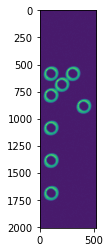

In [24]:
import numpy as np
plt.imshow(np.flipud(hdu.data))

In [22]:
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
detectors = camera.get('R00_SW1')
# iterate over amps 
# set amp headers... 
for amp in detectors :
    print(amp.getName(), amp.getRawFlipX(), amp.getRawFlipY())

C10 True True
C11 True True
C12 True True
C13 True True
C14 True True
C15 True True
C16 True True
C17 True True


In [32]:
camera = LsstCam().getCamera()
for sensor_id in amp_files.keys():
    #sensor_id = list(amp_files.keys())[0]   
    # check if the file does not already exist 
    # may not be obvious since filename depends on DATE-OBS
    # in the input amp file header ... 
    # repackage the corner files 
    sensor=repackage_corner(amp_files[sensor_id], camera,out_dir = '/project/scichris/repackagerTest/intraRpkgd/')

Repackaging sensor R00

 SW1 dict_keys(['17', '16', '15', '14', '13', '12', '11', '10'])
Using amp info for R00_SW1
10
Flipping up-down..
11
Flipping up-down..
12
Flipping up-down..
13
Flipping up-down..
14
Flipping up-down..
15
Flipping up-down..
16
Flipping up-down..
17
Flipping up-down..
New filename: MC_P_20000217_000032_R00_SW1.fits
Saved as /project/scichris/repackagerTest/intraRpkgd/MC_P_20000217_000032_R00_SW1.fits

 SW0 dict_keys(['17', '16', '15', '14', '13', '12', '11', '10'])
Using amp info for R00_SW0
10
11
12
13
14
15
16
17
New filename: MC_P_20000217_000032_R00_SW0.fits
Saved as /project/scichris/repackagerTest/intraRpkgd/MC_P_20000217_000032_R00_SW0.fits
Repackaging sensor R04

 SW1 dict_keys(['17', '16', '15', '14', '13', '12', '11', '10'])
Using amp info for R04_SW1
10
Flipping up-down..
11
Flipping up-down..
12
Flipping up-down..
13
Flipping up-down..
14
Flipping up-down..
15
Flipping up-down..
16
Flipping up-down..
17
Flipping up-down..
New filename: MC_P_20000217_0

**check that the header is indeed there... **

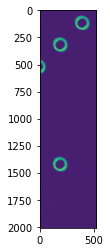

In [11]:
import astropy.io.fits as fits
fPath = '/project/scichris/repackagerTest/intraRpkgd/MC_P_20000217_000032_R00_SW1.fits'
hdu =fits.open(fPath)
plt.imshow(hdu[5].data)

In [13]:
hdu[1].header['DATASEC']

'[4:512,1:2000]'

In [14]:
hdu[1].header['DETSEC']

'[4072:3564,2000:1]'

Remove hthe previously ingested repo, and then ingest the raw repackaged files into a butler repo .. 

In [29]:
import os 
rawImgFiles = os.path.join('/project/scichris/repackagerTest/intraRpkgd/', "*.fits")
isrDir = os.path.join('/project/scichris/repackagerTest/', 'input_w48/')

argstring = '%s %s '%(isrDir, rawImgFiles)
print("\nRun in a terminal the following:")
rawDir = os.path.join(isrDir, 'raw')
regFile = os.path.join(isrDir, 'registry*')
print('rm -rf %s'%rawDir)
print('rm %s'%regFile)
print("ingestImages.py %s"%argstring)


Run in a terminal the following:
rm -rf /project/scichris/repackagerTest/input_w48/raw
rm /project/scichris/repackagerTest/input_w48/registry*
ingestImages.py /project/scichris/repackagerTest/input_w48/ /project/scichris/repackagerTest/intraRpkgd/*.fits 


In [ ]:
#from astro_metadata_translator.translators.helpers import tracking_from_degree_headers
#tracking_from_degree_headers??

### Develop test for the repackager: 

In [28]:

from lsst.utils import getPackageDir
from lsst.phosim.utils.phosim_repackager import PhoSimRepackager

import os
import shutil
import astropy.io.fits as fits
import unittest

class TestPhoSimRepackager(unittest.TestCase):

    def setUp(self):

        self.phoSim_repackager = PhoSimRepackager()

        package_dir = getPackageDir("phosim_utils")
        test_dir = os.path.join(package_dir, "tests")

        self.tmp_test_dir = os.path.join(test_dir, "tmp")
        self._make_dir(self.tmp_test_dir)

        self.test_data_dir = os.path.join(test_dir, "testData")
        self.base_eimg_file_name = "lsst_e_9006001_f1_R22_S00_E000.fits"
        self.eimg_file_path = os.path.join(
            self.test_data_dir, "%s.gz" % self.base_eimg_file_name)

    def _make_dir(self, directory):

        if (not os.path.exists(directory)):
            os.makedirs(directory)

    def tearDown(self):

        shutil.rmtree(self.tmp_test_dir)

    def test_process_visit_eimage(self):

        num_file = self._get_num_of_file_in_dir(self.tmp_test_dir)
        self.assertEqual(num_file, 0)

        self.phoSim_repackager.process_visit_eimage(
            self.test_data_dir, out_dir=self.tmp_test_dir, prefix='lsst')

        num_file = self._get_num_of_file_in_dir(self.tmp_test_dir)
        self.assertEqual(num_file, 1)
        
        
    def test_repackage_eimage(self):

        num_file = self._get_num_of_file_in_dir(self.tmp_test_dir)
        self.assertEqual(num_file, 0)

        self.phoSim_repackager.repackage_eimage(
            self.eimg_file_path, out_dir=self.tmp_test_dir)

        num_file = self._get_num_of_file_in_dir(self.tmp_test_dir)
        self.assertEqual(num_file, 1)

        file_name = self.base_eimg_file_name
        self._check_repackaged_eimg_file(file_name)

    def _check_repackaged_eimg_file(self, file_name):

        eimg_file = os.path.join(self.tmp_test_dir, file_name)
        sensor = fits.open(eimg_file)[0]

        # Check the image is transposed
        self.assertEqual(sensor.data.shape, (4000, 4072))

        # Check the header imformation
        header = sensor.header
        self.assertEqual(header['RAFTNAME'], 'R22')
        self.assertEqual(header['SENSNAME'], 'S00')
        self.assertEqual(header['ROTANGLE'], 0.0)

    def _get_num_of_file_in_dir(self, directory):

        return len([name for name in os.listdir(directory)
                   if os.path.isfile(os.path.join(directory, name))])

In [35]:
test = TestPhoSimRepackager()

In [36]:
test.setUp()

In [37]:
test.tmp_test_dir

'/project/scichris/dev/phosim_utils/tests/tmp'

In [38]:
test.eimg_file_path

'/project/scichris/dev/phosim_utils/tests/testData/lsst_e_9006001_f1_R22_S00_E000.fits.gz'

In [13]:
test.phoSim_repackager.process_visit_eimage(test.test_data_dir, out_dir=test.tmp_test_dir)

repackaging /project/scichris/dev/phosim_utils/tests/testData/lsst_e_9006001_f1_R22_S00_E000.fits.gz

Repackaging main  R22 S00
Saved as /project/scichris/dev/phosim_utils/tests/tmp/MC_H_20211231_440479_R22_S00.fits


In [ ]:
phoSim_repackager.repackage_eimage(
            self.eimg_file_path, out_dir=self.tmp_test_dir)

In [39]:
test.test_process_visit_eimage()

repackaging /project/scichris/dev/phosim_utils/tests/testData/lsst_e_9006001_f1_R22_S00_E000.fits.gz

Repackaging main  R22 S00
Saved as /project/scichris/dev/phosim_utils/tests/tmp/MC_H_20211231_347459_R22_S00.fits


In [34]:
test.tearDown()

In [32]:
test._get_num_of_file_in_dir(test.tmp_test_dir)

1

In [ ]:
test.assertEqual

## Read the Phosim BOT-like files with butler : 

In [1]:
from lsst.obs.lsst import LsstCam

In [1]:
#It is possible to read the data with butler on LSP, I tried 
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/repackagerTest/input_w48/'
butler = dafPersist.Butler(dataRoot, )
dataId = dict(run='9006002', raftName='R04', detectorName='SW0')
butler.queryMetadata('raw', ['dayObs', 'visit'], dataId, seqNum=32)



[('2000-02-17', 3000021700032)]

for WFS : 

In [5]:
#Butler Gen2
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/repackagerTest/input_w50_comcamAmp/'
butler = dafPersist.Butler(dataRoot, )
dataId = dict(run='9006001', raftName='R22', detectorName='S00')
post = butler.get('raw', dataId)


Fixing header
Properties: {'temperature', 'observation_counter', 'relative_humidity', 'detector_unique_name', 'pressure', 'instrument', 'altaz_begin', 'boresight_rotation_coord', 'detector_group', 'observation_type', 'physical_filter', 'tracking_radec', 'dark_time', 'exposure_time', 'datetime_end', 'object', 'observation_id', 'visit_id', 'boresight_airmass', 'detector_num', 'boresight_rotation_angle', 'observation_reason', 'detector_name', 'location', 'telescope', 'exposure_group', 'detector_serial', 'science_program', 'datetime_begin', 'observing_day', 'detector_exposure_id', 'exposure_id'}
to_temperature _temperature
to_observation_counter _observation_counter
to_relative_humidity _relative_humidity
to_detector_unique_name _detector_unique_name
to_pressure _pressure
to_instrument _instrument
to_altaz_begin _altaz_begin
to_boresight_rotation_coord _boresight_rotation_coord
to_detector_group _detector_group
to_observation_type _observation_type
to_physical_filter _physical_filter
to_tr

In [1]:
from lsst.daf.butler import Butler
dataRoot = "/project/scichris/repackagerTest/input_w50_comcamAmp_Gen3/"
butler = Butler(dataRoot)

In [10]:
dataId = dict(instrument='LSSTComCam',  detector='R22_S00')
butler.get('raw', **dataId)

KeyError: "No value in data ID ({'detector': 0}) for required dimension 'exposure'."

RuntimeError: DataId specification for dimension detector matched no records when constrained by {'full_name': 'S00'}

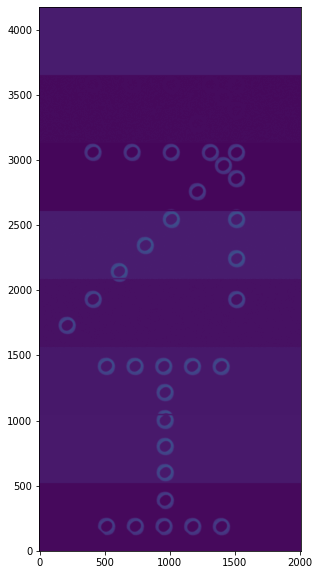

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/repackagerTest/input_w48_rot/'
butler = dafPersist.Butler(dataRoot, )

dataId = dict(run='9006002', raftName='R04', detectorName='SW1')
post = butler.get('raw', dataId)
image = post.image.array

# THE UNTRANSPOSED IMAGE, SHOWING WHY UP-DOWN FLIP WAS NEEDED 
# fig,ax = plt.subplots(1,1,figsize=(5,10))
# ax.imshow(image, origin='lower',vmax=2000)

# THE TRANSPOSED IMAGE: SHOWING THE CORRECT ORIENTATION ... 
fig,ax = plt.subplots(1,1,figsize=(5,10))
ax.imshow(image.T, origin='lower',vmax=2000)

Plot all four corners: 

In [49]:
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/repackagerTest/input_w48_rot/'
butler = dafPersist.Butler(dataRoot, )


images= dict()
for raftName in ['R40', 'R44', 'R00', 'R04']:
    images[raftName] = dict()
    for detectorName in ['SW0', 'SW1']:     
        dataId = dict(run='9006002', raftName=raftName, detectorName=detectorName)
        post = butler.get('raw', dataId)
        print('Reading in ', dataId)
        image = post.image.array
        
        images[raftName][detectorName] = image

Reading in  {'run': '9006002', 'raftName': 'R40', 'detectorName': 'SW0'}
Reading in  {'run': '9006002', 'raftName': 'R40', 'detectorName': 'SW1'}
Reading in  {'run': '9006002', 'raftName': 'R44', 'detectorName': 'SW0'}
Reading in  {'run': '9006002', 'raftName': 'R44', 'detectorName': 'SW1'}
Reading in  {'run': '9006002', 'raftName': 'R00', 'detectorName': 'SW0'}
Reading in  {'run': '9006002', 'raftName': 'R00', 'detectorName': 'SW1'}
Reading in  {'run': '9006002', 'raftName': 'R04', 'detectorName': 'SW0'}
Reading in  {'run': '9006002', 'raftName': 'R04', 'detectorName': 'SW1'}


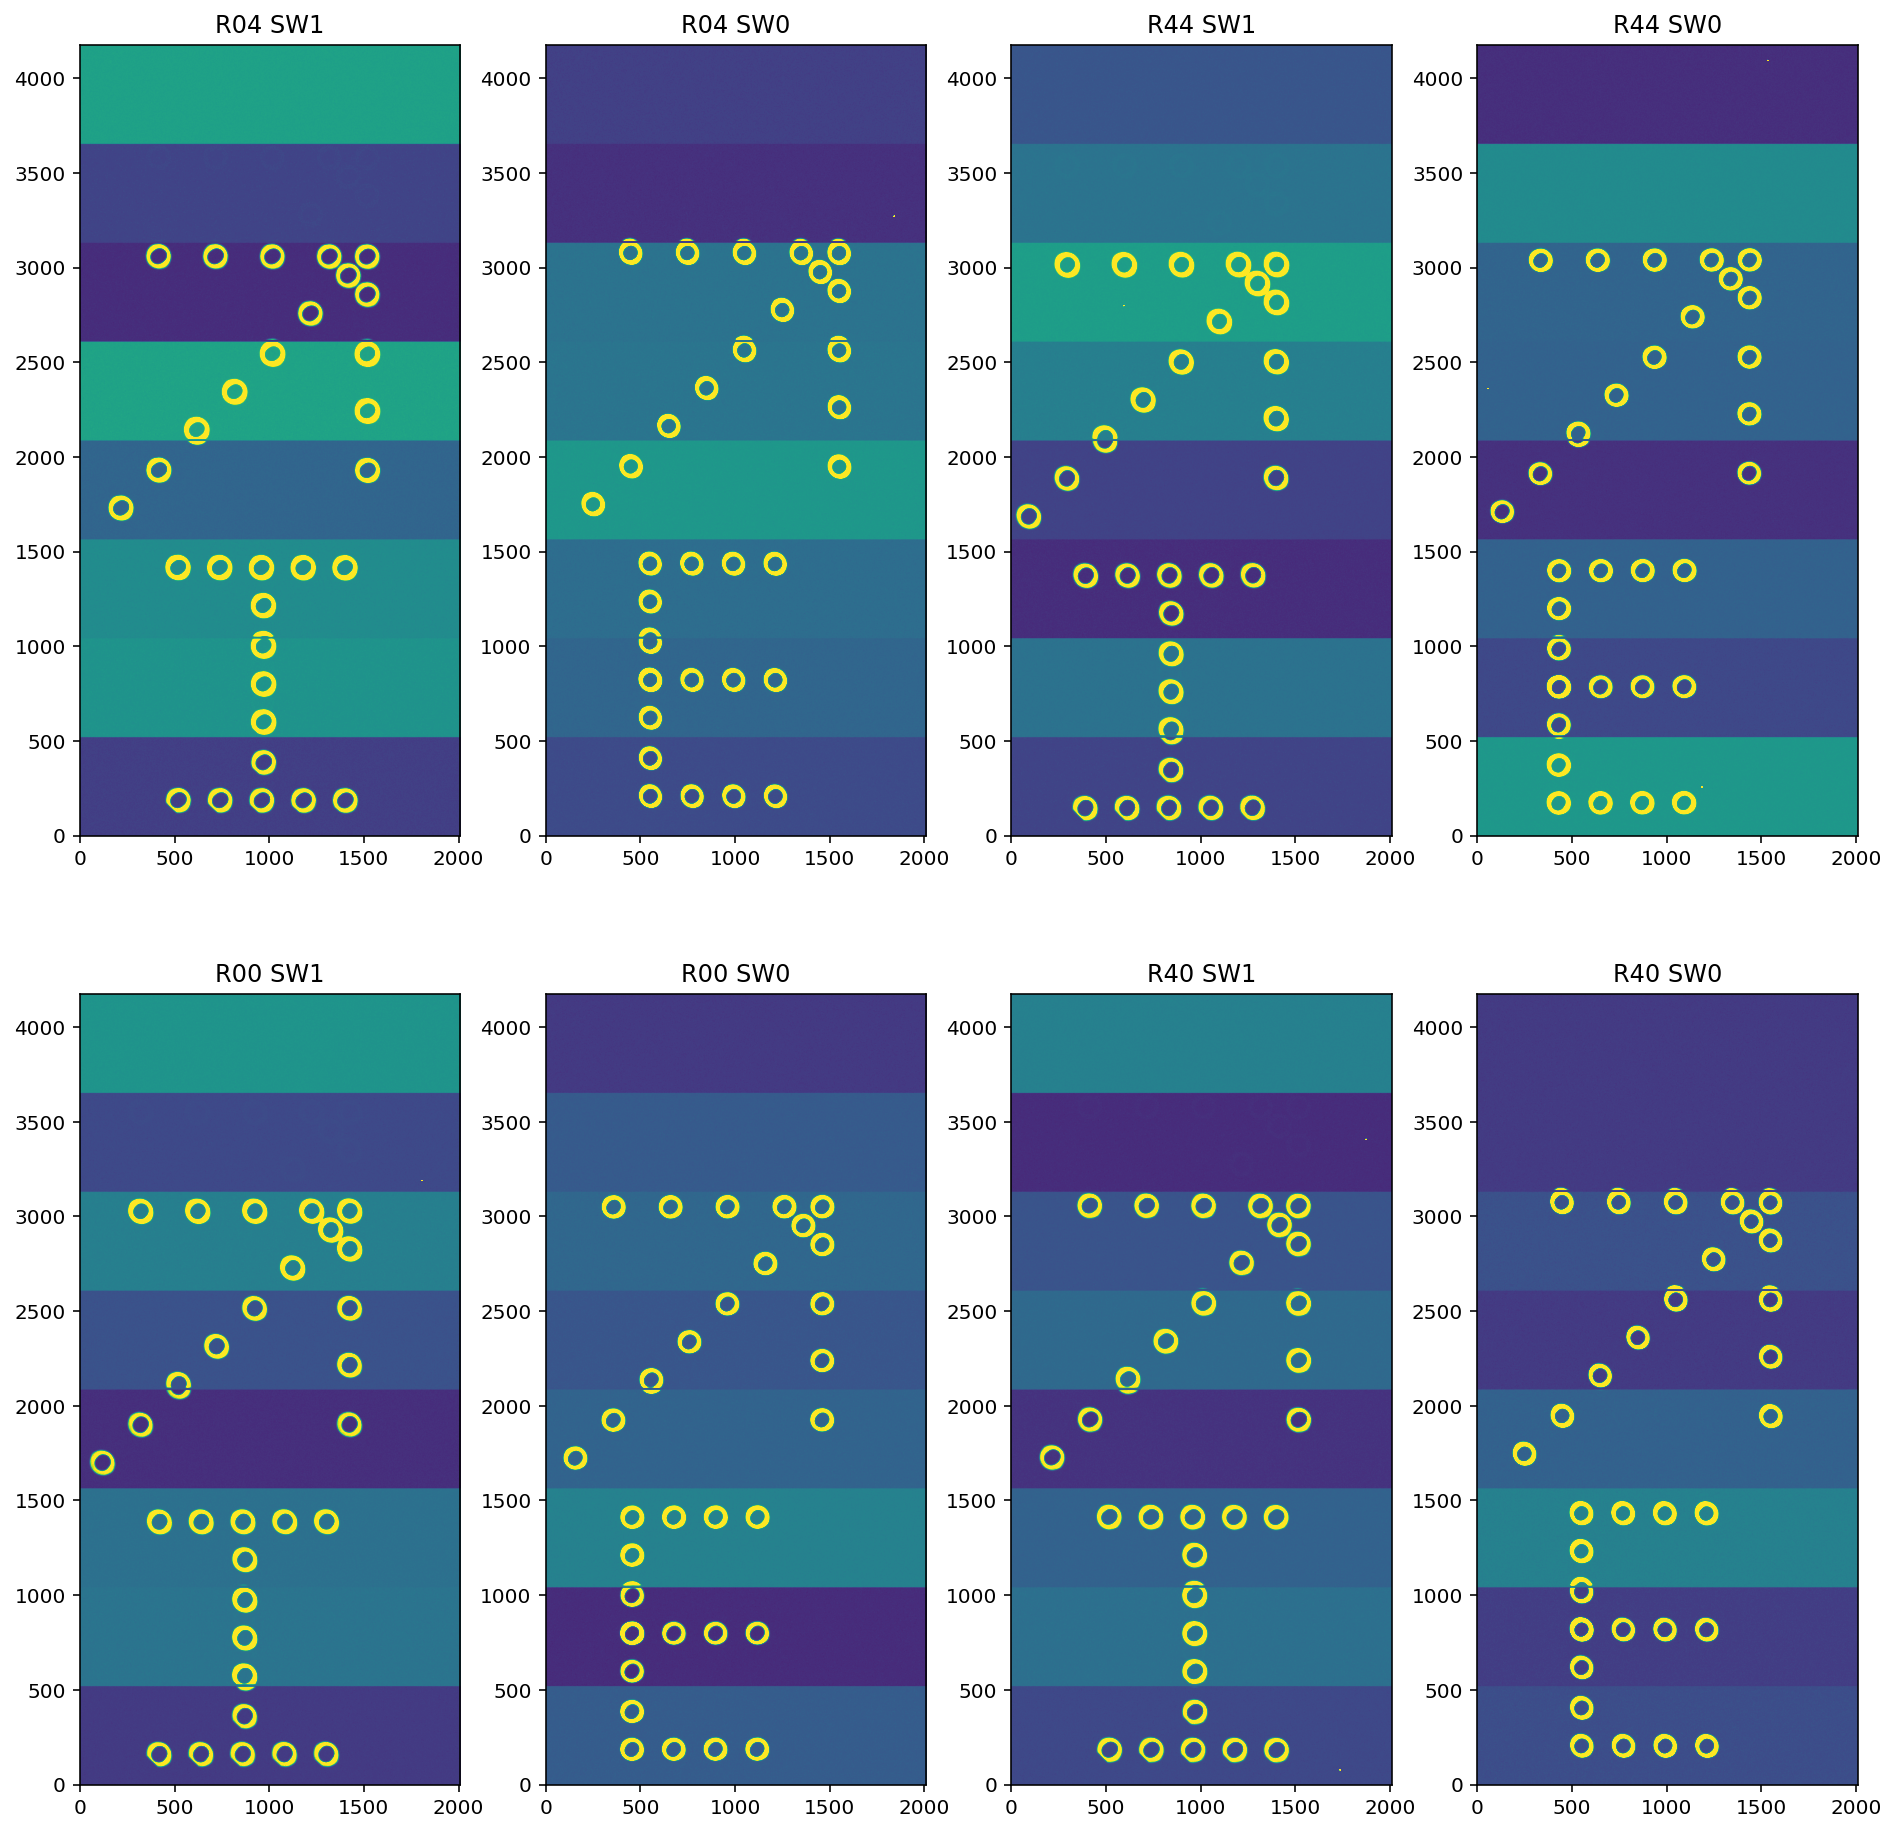

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

a = 4
fig,axs = plt.subplots(2,4,figsize=(4*a,4*a))
ax = np.ravel(axs)
i=0
for raftName in ['R04', 'R44', 'R00', 'R40']:
    for detectorName in ['SW1', 'SW0']:     
        #dataId = dict(run='9006002', raftName=raftName, detectorName=detectorName)
        #post = butler.get('raw', dataId)
        #print('Reading in ', dataId)
        #image = post.image.array
        image = images[raftName][detectorName]
        # THE TRANSPOSED IMAGE: SHOWING THE CORRECT ORIENTATION ... 
        ax[i].imshow(image.T, origin='lower',vmax=1100)
        ax[i].set_title('%s %s'%(raftName, detectorName))
        i+=1 

for comcam : 

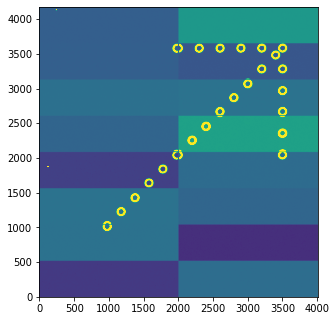

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/repackagerTest/input_w48_comcam/'
butler = dafPersist.Butler(dataRoot, )

dataId = dict(run='9006001', raftName='R22', detectorName='S00')
post = butler.get('raw', dataId)
image = post.image.array

# THE UNTRANSPOSED IMAGE, SHOWING WHY UP-DOWN FLIP WAS NEEDED 
# fig,ax = plt.subplots(1,1,figsize=(5,10))
# ax.imshow(image, origin='lower',vmax=2000)

# THE TRANSPOSED IMAGE: SHOWING THE CORRECT ORIENTATION ... 
fig,ax = plt.subplots(1,1,figsize=(5,10))
ax.imshow(image.T, origin='lower',vmax=1100)



plot the entire R22 : 

In [42]:
images= dict()
raftName = 'R22'
for detectorName in ['S00', 'S01','S02',
                    'S10','S11','S12',
                    'S20','S21','S22']:     
    dataId = dict(run='9006001', raftName=raftName, detectorName=detectorName)
    post = butler.get('raw', dataId)
    print('Reading in ', dataId)
    image = post.image.array

    images[detectorName] = image

Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S00'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S01'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S02'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S10'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S11'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S12'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S20'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S21'}
Reading in  {'run': '9006001', 'raftName': 'R22', 'detectorName': 'S22'}


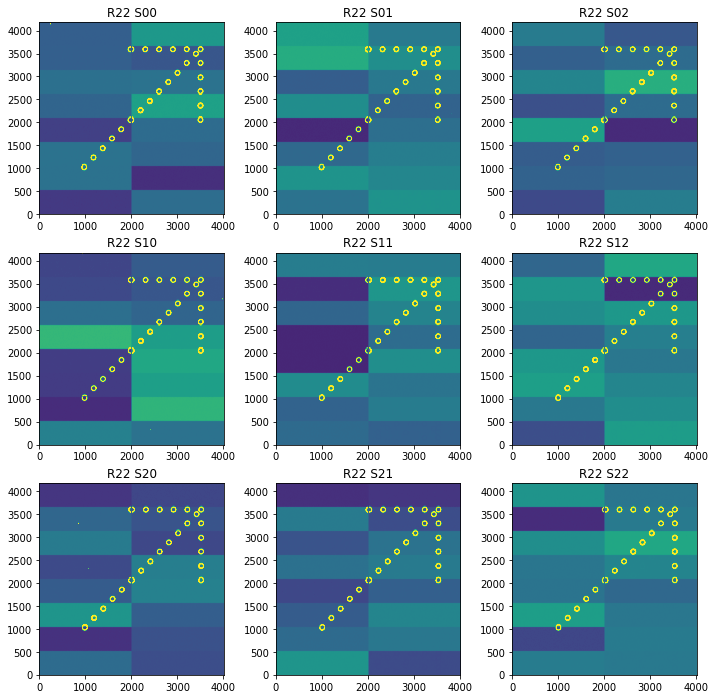

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

a = 4
fig,axs = plt.subplots(3,3,figsize=(3*a,3*a))
ax = np.ravel(axs)
i=0
raftName = 'R22'

for detectorName in images.keys():# ['SW1', 'SW0']:     
    image = images[detectorName]
    # THE TRANSPOSED IMAGE: SHOWING THE CORRECT ORIENTATION ... 
    ax[i].imshow(image.T, origin='lower',vmax=1100)
    ax[i].set_title('%s %s'%(raftName, detectorName))
    i+=1 

In [ ]:
# Read the butler Gen3 repo ... 




# Try reading the postISR for lsstFamCam 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/aos/results_lsstfam_noCrosstalk/input/'
butler = dafPersist.Butler(dataRoot, )



In [30]:
dataId = dict(run='9006002', visit=4021123106002, raftName='R32', detectorName='S11')
butler.datasetExists('raw', dataId)


True

In [31]:
post = butler.get('raw', dataId)


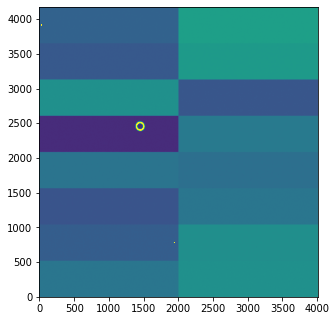

In [32]:
image = post.image.array
fig,ax = plt.subplots(1,1,figsize=(5,10))
ax.imshow(image.T, origin='lower',vmax=1100)


In [36]:
import os
repoRoot = os.path.join(dataRoot, 'rerun/run1')
postISRbutler = dafPersist.Butler(repoRoot, )
#postISR = butler.get('postISR', dataId)

In [39]:
dataId

{'run': '9006002',
 'visit': 4021123106002,
 'raftName': 'R32',
 'detectorName': 'S11'}

In [40]:
dataId = dict(run='9006002', visit=4021123106002, raftName='R01', detectorName='S11')
postISR = postISRbutler.get('postISRCCD', **dataId) 


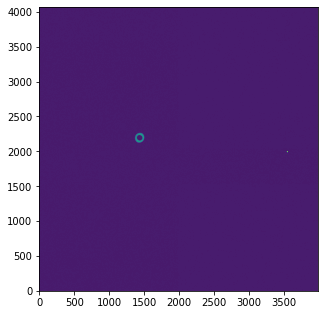

In [55]:
imageISR = postISR.image.array
fig,ax = plt.subplots(1,1,figsize=(5,10))
ax.imshow(imageISR.T, origin='lower',vmax=500)


In [54]:
import numpy as np 
plt.hist(np.ravel(imageISR),range=(100,400))

(array([4.010e+02, 4.330e+02, 5.760e+02, 1.355e+03, 2.304e+03, 2.291e+03,
        9.900e+02, 2.030e+02, 4.000e+01, 2.000e+00]),
 array([100., 130., 160., 190., 220., 250., 280., 310., 340., 370., 400.],
       dtype=float32),
 <BarContainer object of 10 artists>)


## Develop test for a  new controller  name ... 


In [21]:
import os.path
import unittest

from lsst.pipe.tasks.ingest import IngestConfig
import lsst.daf.base
import lsst.log

import lsst.obs.lsst.translators  # noqa: F401 -- register the translators
from lsst.obs.lsst.latiss import LatissParseTask
from lsst.obs.lsst.ts8 import Ts8ParseTask
from lsst.obs.lsst.ts3 import Ts3ParseTask
from lsst.obs.lsst.phosim import PhosimParseTask, PhosimEimgParseTask
from lsst.obs.lsst.imsim import ImsimParseTask
from lsst.obs.lsst.ucd import UcdParseTask
from lsst.obs.lsst.comCam import LsstComCamParseTask
from lsst.obs.lsst.ingest import LsstCamParseTask

#TESTDIR = os.path.abspath(os.path.dirname(__file__))
DATADIR = '/project/scichris/repackagerTest/input_w48_comcam/'
#ROOTDIR = os.path.normpath(os.path.join(TESTDIR, os.path.pardir))
#DATADIR = os.path.join(ROOTDIR, "data", "input")
#CONFIGDIR = os.path.join(ROOTDIR, "config")

In [20]:
os.path.normpath?

Signature: os.path.normpath(path)
Docstring: Normalize path, eliminating double slashes, etc.
File:      /opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/posixpath.py
Type:      function


In [8]:
from astropy.io import fits
dataRoot = '/project/scichris/repackagerTest/extraRpkgdAmp/MC_H_20000217_000032_R22_S00.fits'
#os.listdir(dataRoot)
hdul = fits.open(dataRoot)
header = hdul[0].header

header_dict = dict()
for key in header.keys():
    header_dict[key] = header[key]    

In [14]:
header_dict

{'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 0,
 'EXTEND': True,
 'EXPTIME': 15.0,
 'DARKTIME': 15.0,
 'RUNNUM': '9006001',
 'MJD-OBS': 51591.0934411944,
 'DATE-OBS': '2000-02-17T02:14:33.319',
 'DAYOBS': '20000217',
 'DATE': '2020-12-08T03:03:53',
 'MJD': 59191.12769675926,
 'FILTER': 'g',
 'LSST_NUM': 'E2V-CCD250-369',
 'CCD_MANU': 'E2V',
 'CCD_TYPE': 'CCD250',
 'DETSIZE': '[1:4096,1:4004]',
 'INSTRUME': 'lsstCam',
 'TELESCOP': 'LSST',
 'TELCODE': 'MC',
 'CONTRLLR': 'H',
 'SEQNUM': 32,
 'OBSID': 'MC_H_20000217_000032',
 'TESTTYPE': 'PHOSIM',
 'IMGTYPE': 'SKYEXP',
 'RAFTBAY': 'R22',
 'CCDSLOT': 'S00',
 'RASTART': 0.0,
 'DECSTART': 0.0,
 'ROTSTART': 0.0,
 'RA': 0.0,
 'DEC': 0.0,
 'ROTPA': 0.0,
 'ROTPOS': 0.0}

In [11]:
import numpy as np 
np.random.randint?


Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k

In [15]:
filePath = '/project/scichris/dev/obs_lsst_dev/tests/headers/lsstCam-MC_H_20000217_000032_R22_S00.yaml'
with open(filePath, 'w') as file:
    documents = yaml.dump(header_dict, file)

In [1]:
from astro_metadata_translator.tests import read_test_file
from astro_metadata_translator import ObservationInfo
import lsst.obs.lsst.translators  
filename=  'lsstCam-MC_H_20000217_000032_R22_S00.yaml'
#filename='lsstCam-MC_C_20190319_000001_R10_S02.yaml'
datadir = '/project/scichris/dev/obs_lsst_dev/tests/headers/'
header =  read_test_file(filename, dir=datadir)
obsinfo = ObservationInfo(header, pedantic=True, filename=filename)


Fixing header
Properties: {'telescope', 'detector_name', 'exposure_id', 'observing_day', 'exposure_time', 'dark_time', 'location', 'datetime_begin', 'relative_humidity', 'pressure', 'physical_filter', 'observation_counter', 'detector_exposure_id', 'observation_id', 'detector_num', 'object', 'tracking_radec', 'science_program', 'boresight_airmass', 'altaz_begin', 'observation_type', 'exposure_group', 'detector_unique_name', 'visit_id', 'datetime_end', 'boresight_rotation_angle', 'detector_group', 'observation_reason', 'boresight_rotation_coord', 'detector_serial', 'temperature', 'instrument'}
to_telescope _telescope
to_detector_name _detector_name
to_exposure_id _exposure_id
To exposure id 
compute_exposure_id
to_observing_day _observing_day
to_observing_day
to_exposure_time _exposure_time
to_dark_time _dark_time
To dark time
to_location _location
to_location
is_on_mountain
to_datetime_begin _datetime_begin
to_datetime_begin
to_relative_humidity _relative_humidity
to_pressure _pressure


In [2]:
lsst.obs.lsst.translators.lsstCam.LsstCamTranslator?

Init signature: lsst.obs.lsst.translators.lsstCam.LsstCamTranslator(header, filename=None)
Docstring:      Metadata translation for the main LSST Camera.
File:           /project/scichris/dev/obs_lsst_dev/python/lsst/obs/lsst/translators/lsstCam.py
Type:           type
Subclasses:     LsstComCamTranslator


In [7]:
lsst.obs.lsst.translators?

Type:        module
String form: <module 'lsst.obs.lsst.translators' from '/project/scichris/dev/obs_lsst_dev/python/lsst/obs/lsst/translators/__init__.py'>
File:        /project/scichris/dev/obs_lsst_dev/python/lsst/obs/lsst/translators/__init__.py
Docstring:   <no docstring>


In [4]:
translator = obsinfo.translator_class_name

In [ ]:
translator = obsinfo.translator_class_name

In [ ]:
translator = obsinfo.translator_class_name

In [38]:
translator

'LsstCamTranslator'

In [39]:
obsinfo.observation_type

'science'

In [6]:
obsinfo.tracking_radec

In [41]:
obsinfo.

SyntaxError: invalid syntax (<ipython-input-41-0fd9f9238e4c>, line 1)

In [33]:
hdul[0].header




SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
EXPTIME =                 15.0                                                  
DARKTIME=                 15.0                                                  
RUNNUM  = '9006001 '                                                            
MJD-OBS =     51591.0934411944                                                  
DATE-OBS= '2000-02-17T02:14:33.319'                                             
DAYOBS  = '20000217'                                                            
DATE    = '2020-12-08T03:03:58'                                                 
MJD     =    59191.12775462963                                                  
FILTER  = 'g       '        

In [ ]:
def test_parsetask_latiss_translator(self):
    """Run the gen 2 metadata extraction code for LATISS"""
    test_data = (("raw/2018-09-20/3018092000065-det000.fits",
                  dict(
                      expTime=15.0,
                      imageType='SKYEXP',
                      detectorName='S01',
                      dateObs='2000-02-17T02:14:33.319',
                      date='2020-12-08T03:03:58',
                      dayObs='2018-09-20',
                      detector=0,
                      filter='unknown~unknown',
                      seqNum=65,
                      visit=3018092000065,
                      expId=3018092000065,
                      wavelength=-666,
                      controller="C",
                      obsid="AT_C_20180920_000065",
                      expGroup="3018092000065",
                  )),
                 )
    self.assertParseCompare(DATADIR, CONFIGDIR, "latiss", LatissParseTask, test_data)

In [1]:
#sensor.header

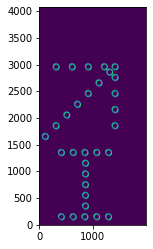

In [59]:
plt.imshow(sensor.data, origin='lower')

In [ ]:


# Set keywords in primary HDU, extracting most of the relevant
# ones from the original phosim eimage file.
sensor.header['RUNNUM'] = sensor.header['OBSID']
sensor.header['DATE-OBS'] = \
astropy.time.Time(sensor.header['MJD-OBS'], format='mjd').isot

chip_id = sensor.header['CHIPID']
sensor.header['LSST_NUM'] = chip_id

parts = chip_id.split('_')
raft = parts[0]
ccd = parts[1]
sensor.header['RAFTNAME'] = raft
sensor.header['SENSNAME'] = ccd

sensor.header['TESTTYPE'] = 'PHOSIM'
sensor.header['IMGTYPE'] = 'SKYEXP'
sensor.header['MONOWL'] = -1

# Add boresight pointing angles and rotskypos (angle of sky
# relative to Camera coordinates) from which obs_lsst can
# infer the CCD-wide WCS.
sensor.header['RATEL'] = sensor.header['RA_DEG']
sensor.header['DECTEL'] = sensor.header['DEC_DEG']

# The rotation angle has different names in different versions
try:
    sensor.header['ROTANGLE'] = sensor.header['ROTANGZ']
except KeyError:
    try:
        sensor.header['ROTANGLE'] = sensor.header['ROTANG']
    except KeyError as e:
        raise(e)

# Transpose the image to fulfill the geometry of postISRCCD by obs_lsst
sensor.data = sensor.data.T

outfile = self.mef_filename_eimage(phosim_eimg_file, out_dir=out_dir)
sensor.writeto(outfile, overwrite=True)



In [ ]:
def mef_filename_eimage(phosim_eimg_file, out_dir='.'):
    """Construct the filename of the output file based on a phosim single
    eimage filename."""

    basename = os.path.basename(phosim_eimg_file)
    outfile = os.path.join(out_dir, basename)
    # astropy's gzip compression is very slow, so remove any .gz
    # extension from the computed output filename and gzip the
    # files later.
    if outfile.endswith('.gz'):
        outfile = outfile[:-len('.gz')]
    return outfile

Use Robert Lupton's 3rd Gen Butler notebook  `Pinhole.ipynb` : 

In [46]:
dataRoot

'/project/scichris/repackagerTest/input_w48_rot/'

In [40]:
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

#dataRoot = "/lsstdata/offline/teststand/BOT/gen3repo"
#from lsst.daf.butler import Butler
butler = dafPersist.Butler(dataRoot, )#

In [45]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 7)

camera = butler.get("camera")
dataId = dict(run='9006002')
seqNum = 32
afwDisplay.setDefaultBackend("matplotlib")
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

disp = afwDisplay.Display(fig)
disp.scale('asinh', 'zscale', Q=2)
disp.scale('linear', 'minmax')
disp.scale('asinh', 5, 7000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')
disp.show_colorbar(False)

dataType = "raw"
seqNum = 32

for i, raftName in enumerate(['R40', 'R44', 'R00', 'R04'], 1):
    ax = fig.add_subplot(2, 2, i)

    detectorNameList = [det.getName() for det in camera if f"{raftName}" in det.getName()]

    mos = cameraGeomUtils.showCamera(camera,
                                     cameraGeomUtils.ButlerImage(butler, dataType, run=dataId["run"], seqNum=seqNum,
                                                                verbose=True),
                                     binSize=4, detectorNameList=detectorNameList, display=disp, overlay=False,
                                     title=raftName)
    disp.show_colorbar(False)


Reading 197: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 197, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 198: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 198, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 201: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 201, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 202: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 202, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 189: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 189, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 190: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 190, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 193: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 193, 'run': '9006002', 'seqNum': 32}, tag=set())

In [47]:
detectorNameList

['R04_SG0', 'R04_SG1', 'R04_SW0', 'R04_SW1']

In [ ]:

dataId = dataId0.copy()
dataId["exposure.science_program"] = run
dataId["detector"] = camera['R22_S11'].getId()

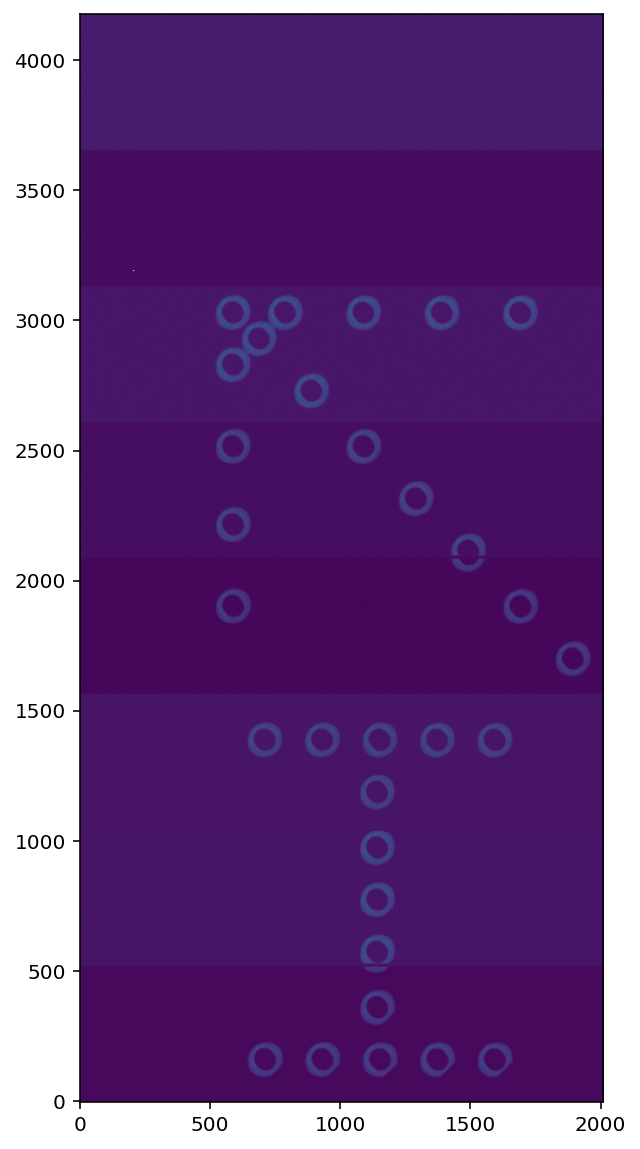

In [56]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.0)

disp = afwDisplay.Display(fig)
disp.scale('asinh', 'zscale', Q=2)
disp.scale('linear', 'minmax')
disp.scale('asinh', 5, 7000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')
dataType = "raw"
for i, raftName in enumerate(['R40', 'R44', 'R00', 'R04'], 1):
    ax = fig.add_subplot(2, 2, i)
    
    detectorNameList = [det.getName() for det in camera if f"{raftName}" in det.getName()]

    mos = cameraGeomUtils.showCamera(camera,
                                     cameraGeomUtils.ButlerImage(butler, dataType, instrument='LSSTCam', exposure=exposure,
                                                                 #run=dataId["run"], seqNum=seqNum,
                                                                verbose=True),
                                     binSize=16, detectorNameList=detectorNameList, display=disp, overlay=False,
                                     title=raftName)
    disp.show_colorbar(False)

Try to make an image with the stack tools : 

In [13]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt   # Not needed for image displays, but used for analysis

%matplotlib ipympl
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 7)

afwDisplay.setDefaultBackend("matplotlib")

dataType = "raw"
seqNum = 32

dataRoot = '/project/scichris/repackagerTest/input_w48/'
#calibRoot=os.path.join(dataRoot, "rerun/rhl", "CALIB-6813D")

butler = dafPersist.Butler(dataRoot, )#calibRoot=calibRoot)

camera = butler.get("camera")

dataId = dict(run='9006002',)# visit='')

butler.queryMetadata('raw', ['dayObs', 'visit'], dataId, seqNum=32)



[('2000-02-17', 3000021700032)]

In [17]:
raftName = 'R40'
detectorNameList = [det.getName() for det in camera if f"{raftName}" in det.getName()]
detectorNameList

['R40_SG0', 'R40_SG1', 'R40_SW0', 'R40_SW1']

In [23]:
cameraGeomUtils.ButlerImage?

Init signature:
cameraGeomUtils.ButlerImage(
    butler=None,
    type='raw',
    isTrimmed=True,
    verbose=False,
    background=nan,
    callback=None,
    *args,
    **kwargs,
)
Docstring:     
A class to return an Image of a given Ccd using the butler.

Parameters
----------
butler : `lsst.daf.persistence.Butler` or `None`
    The butler to use. If `None`, an empty image is returned.
type : `str`
    The type of image to read (e.g. raw, bias, flat, calexp).
isTrimmed : `bool`
    If true, the showCamera command expects to be given trimmed images.
verbose : `bool`
    Be chatty (in particular, log any error messages from the butler)?
background : `float`
    The value of any pixels that lie outside the CCDs.
callback : callable
    A function called with (image, ccd, butler) for every image, which
    returns the image to be displayed (e.g. rawCallback). The image must
    be of the correct size, allowing for the value of isTrimmed.
*args : `list`
    Passed to the butler.
**kwarg

In [27]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

disp = afwDisplay.Display(fig)
#disp.scale('asinh', 'zscale', Q=2)
disp.scale('linear', 'minmax')
#disp.scale('asinh', 5, 1000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')
#disp.show_colorbar(False)
ax= fig.add_subplot(1,1,1)
raftName = 'R40'
detectorNameList = ['R40_SW0', 'R40_SW1']
dataType = 'raw'
cameraGeomUtils.showCamera(camera, 
                          cameraGeomUtils.ButlerImage(butler, 'raw', run=dataId["run"],
                                                     seqNum=seqNum, verbose=True), 
                          detectorNameList=detectorNameList, display=disp, 
                          title=raftName)
disp.show_colorbar(False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

disp = afwDisplay.Display(fig)
#disp.scale('asinh', 'zscale', Q=2)
#disp.scale('linear', 'minmax')
#disp.scale('asinh', 5, 1000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')
disp.show_colorbar(False)

dataType = "raw"
seqNum = 32

i = 0
raftName = 'R40'
ax = fig.add_subplot(2,2,i)




for i, raftName in enumerate(['R40', 'R44', 'R00', 'R04'], 1):
    ax = fig.add_subplot(2, 2, i)

    detectorNameList = [det.getName() for det in camera if f"{raftName}" in det.getName()]

    mos = cameraGeomUtils.showCamera(camera,
                                     cameraGeomUtils.ButlerImage(butler, dataType, run=dataId["run"], seqNum=seqNum,
                                                                  verbose=True),
                                     binSize=4, detectorNameList=detectorNameList, display=disp, overlay=False,
                                     title=raftName)
    disp.show_colorbar(False)

In [ ]:
f

## Check the raw BOT files (before ingestion)

In [1]:


import glob
import os
from astropy.table import Table
import numpy as np
import astropy.io.fits as fits
# IMPORT PLOTTING MODULES
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18



#BOT directory : that's what the files should look like 
# seqNum 371 here 
#rawBOTdir = '/lsstdata/offline/teststand/BOT/storage/20200906/MC_C_20200906_000371/'



#files = ['3020090600371-R04-SW0-det195.fits', '3020090600371-R04-SW1-det196.fits',
         
rawIngestedBOT  = '/project/shared/BOT/_parent/raw/2020-09-06/3020090600371/'

#Arrows directory: that's what the files currently look like 
arrowDir = '/project/scichris/arrowStars_repackagerTest/'
rawArrows = os.path.join(arrowDir, 'iter0/img/orig')
rawRepackagedArrows  = os.path.join(arrowDir, 'iter0/img/intra_2020_44')
rawIngestedArrows = os.path.join(arrowDir,'input_2020_44/raw/' )





## That's what phosim after repackaging should look like ... 

In [2]:

# the flammarion image 2020-08-25/3020082500032/'
rawBOTdir = '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/'
raw_BOT_filepaths \
            = sorted(glob.glob(os.path.join(rawBOTdir, f'*SW*')))

In [3]:
raw_BOT_filepaths

['/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R00_SW0.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R00_SW1.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R04_SW0.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R04_SW1.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R40_SW0.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R40_SW1.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R44_SW0.fits',
 '/lsstdata/offline/teststand/BOT/storage/20200825/MC_C_20200825_000032/MC_C_20200825_000032_R44_SW1.fits']

In [4]:
fn = raw_BOT_filepaths[0]
camera, control, obsdate, sequence, raft, sensor = os.path.basename(fn).split('_')

In [5]:
print(camera, control, obsdate, sequence, raft, sensor)

MC C 20200825 000032 R00 SW0.fits


In [6]:
import astropy.io.fits as fits
hdul = fits.open(fn)
len(hdul)

10

In [9]:
# main header 
hdul[0].header

SIMPLE  =                    T / Java FITS: Wed Aug 19 09:20:56 PDT 2020        
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    0 / number of axes                                 
EXTEND  =                    T / Extensions are permitted                       
DATE    = '2020-08-25T21:09:47.010' / Creation Date and Time of File            
MJD     =    59086.88179409737 / Modified Julian Date that the file was written 
RUNNUM  = '12526   '           / The Run Number                                 
CCD_MANU= 'ITL     '           / CCD Manufacturer                               
CCD_TYPE= '4400    '           / CCD Model Number                               
TESTTYPE= 'DARK' / BIAS, DARK, FE55, FLAT, LAMBDA, PERSISTENCE, SPOT, SFLAT_<lam
IMGTYPE = 'DARK    '           / BIAS, DARK, FE55, FLAT, FLAT_<lam>, SPOT, PPUMP
DETSIZE = '[1:4072,1:4000]'                                                     
EXPTIME =                600

In [10]:
# 1:8 - amp headers 
hdul[1].header

XTENSION= 'IMAGE   '           / marks beginning of new HDU                     
BITPIX  =                   32 / bits per data value                            
NAXIS   =                    2 / number of axis                                 
NAXIS1  =                  576 / size of the n'th axis                          
NAXIS2  =                 2048 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
CHECKSUM= '0rA51o640oA40o54'   / checksum for the current HDU                   
CHANNEL =                    1                                                  
EXTNAME = 'Segment10'                                                           
CCDSUM  = '1 1     '                                                            
DATASEC = '[4:512,1:2000]'                                                      
DETSEC  = '[509:1,1:2000]'  

In [26]:
#9 : BIN TABLE 
hdul[9].header

XTENSION= 'BINTABLE'           / marks beginning of new HDU                     
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                    0 / size of the n'th axis                          
NAXIS2  =                    0 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
TFIELDS =                    0 / Number of table fields                         
CHECKSUM= 'iJhFl9Z9iGfCi9Z9'   / checksum for the current HDU                   
EXTNAME = 'REB_COND'           / Name of the extension                          
TEMP1   =               -8.875 / REB Board temperature 1                        
TEMP2   =                -10.5 / REB Board temperature 2                        
TEMP3   =              -14.6

In [24]:
for i in range(1,len(hdul)-1):
    print(hdul[i].header['EXTNAME'],hdul[i].header['DATASEC'],hdul[i].header['DETSEC'],hdul[i].header['DETSIZE'] )
    #hdul[i].header['']

Segment10 [4:512,1:2000] [509:1,1:2000] [1:4072,1:4000]
Segment11 [4:512,1:2000] [1018:510,1:2000] [1:4072,1:4000]
Segment12 [4:512,1:2000] [1527:1019,1:2000] [1:4072,1:4000]
Segment13 [4:512,1:2000] [2036:1528,1:2000] [1:4072,1:4000]
Segment14 [4:512,1:2000] [2545:2037,1:2000] [1:4072,1:4000]
Segment15 [4:512,1:2000] [3054:2546,1:2000] [1:4072,1:4000]
Segment16 [4:512,1:2000] [3563:3055,1:2000] [1:4072,1:4000]
Segment17 [4:512,1:2000] [4072:3564,1:2000] [1:4072,1:4000]


In [37]:
for hdu in hdul[1:-1]:
    print(hdu.header['EXTNAME'][-2:])#hdul[1].header

10
11
12
13
14
15
16
17


In [39]:
segments = dict()
for hdu in hdul[1:-1]:
    channel = hdu.header['EXTNAME'][-2:] # 'Segment10' 
    segments[channel] = hdu
    print(hdu.header['EXTNAME'])

Segment10
Segment11
Segment12
Segment13
Segment14
Segment15
Segment16
Segment17


In [42]:
segments_bot = segments

In [46]:
import matplotlib.pyplot as plt 
fig,ax  = plt.subplots(8,2, figsize=(12,12))
col = 0
segmentsExtra = ['10','11','12','13','14','15','16','17']
segmentsIntra = ['00','01','02','03','04','05','06','07']

# old map : phosim --> raw 
ch_map = {'00': '10',
          '01': '11',
          '02': '12',
          '03': '13',
          '04': '14',
          '05': '15',
          '06': '16',
          '07': '17',
          '17': '07',
          '16': '06',
          '15': '05',
          '14': '04',
          '13': '03',
          '12': '02',
          '11': '01',
          '10': '00'}

xt,yt = 5,5
fontsizet=16

for row in range(0,8):
    segments = segmentsExtra[::-1]
    seg = segments[row]
    hdu  = segments_bot[seg]
    #s = hdu.header['AMPID']
    s = 'C%s'%ch_map[seg]
    img = np.flipud(hdu.data.T)
    ax[row,col].text(xt,yt,s, fontsize=fontsizet, color='white')
    ax[row,col].imshow(img, origin='lower')
ax[0,0].set_title('C0, intra, SW1 \n np.flipud(hdu.data.T)', fontsize=15)

# col=1
# for row in range(0,8):
#     segments = segmentsExtra[::-1]
#     seg = segments[row]
#     hdu  = segments_phosim[seg]
#     #s = hdu.header['AMPID']
#     s = 'C%s'%ch_map[seg]
#     img = np.fliplr(np.flipud(hdu.data.T))
#     ax[row,col].text(xt,yt,s, fontsize=fontsizet, color='white')
#     ax[row,col].imshow(img, origin='lower')
# ax[0,1].set_title('C1, extra, SW0 \n np.fliplr(np.flipud(hdu.data.T))', fontsize=15)
#fig.suptitle('Repackaged channels, old version, %s'%sensor_id, fontsize=18)
#plt.savefig('phosim_repackager_phosim_repackaged_old.png', bbox_inches='tight')

Text(0.5, 1.0, 'C0, intra, SW1 \n np.flipud(hdu.data.T)')

/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator


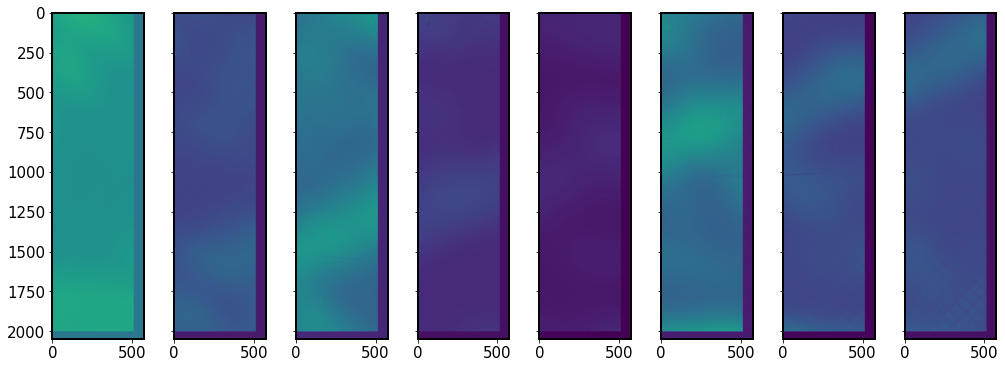

In [30]:

fig,axs  =  plt.subplots(1,8,figsize=(18,6))
for i in range(len(axs)):
    axs[i].imshow(np.log10(hdul[i+1].data))
for i in range(1,len(axs)):
    axs[i].set_yticklabels([0])
plt.subplots_adjust(wspace=-0.2)

(array([1.17964e+06, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([ 11399. ,  24886.2,  38373.4,  51860.6,  65347.8,  78835. ,
         92322.2, 105809.4, 119296.6, 132783.8, 146271. ]),
 <BarContainer object of 10 artists>)

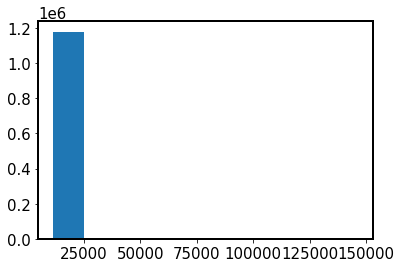

In [56]:
plt.hist(np.ravel(hdul[4].data))

In [42]:
hdul[2].header['EXTNAME']


'Segment11'

In [43]:
hdul[3].header['EXTNAME']


'Segment12'

In [44]:
hdul[4].header['EXTNAME']


'Segment13'

In [45]:
hdul[5].header['EXTNAME']


'Segment14'

# Check channel names in LsstCamMapper (w48)

In [25]:
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
detectors = camera.get('R00_SW0')
for amp in detectors:
    print(amp.getName())

C10
C11
C12
C13
C14
C15
C16
C17


# Compare the GAIN information between PhosimMapper and LsstCamMapper 

In [34]:
from lsst.obs.lsst.phosim import PhosimMapper
camera  = PhosimMapper().camera
# its and lsst.afw.cameraGeom.camera.camera.Camera object 
detector = camera.get('R00_S22')
for amp in detector : 
    print(amp.getName(), amp.getGain())

C10 1.66
C11 1.737
C12 1.804
C13 1.753
C14 1.712
C15 1.653
C16 1.619
C17 1.671
C07 1.679
C06 1.738
C05 1.584
C04 1.689
C03 1.782
C02 1.788
C01 1.596
C00 1.725


In [38]:
from lsst.obs.lsst import version
version.__version__

'19.0.0-110-ga0aedc1+4ecf52c8e0'

In [ ]:
from lsst.obs.lsst.phosim import PhosimMapper
amp_info = list(list(PhosimMapper().camera)[0])
for amp in amp_info:
    amp.getGain()

In [37]:
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
detectorExtra = camera.get('R00_SW0')
detectorIntra = camera.get('R00_SW1')
for amp in detectorExtra : 
    print(amp.getName(), amp.getGain())
for amp in detectorIntra : 
    print(amp.getName(), amp.getGain())

C10 1.679
C11 1.738
C12 1.584
C13 1.689
C14 1.782
C15 1.788
C16 1.596
C17 1.725
C10 1.679
C11 1.738
C12 1.584
C13 1.689
C14 1.782
C15 1.788
C16 1.596
C17 1.725


# Check out the ingested Phosim BOT-like files ...

The phosim files were repackaged on epyc, using the test version of the new phosim_repackager, and copied into `/project/scichris/repackagerTest/intraRpkgd/`:

    cd /project/scichris/repackagerTest/
    scp -rp suberlak@epyc.astro.washington.edu:/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStarsLetters_2020_44/iter0/img/intraRpkgd .


These raw files were ingested first with `2020_47`, i.e. `obs_lsst` tag `g89d052f` into `input_w47`.  Then the same files were ingested with `2020_48`, i.e. `obs_lsst` tag `ga0aedc1` , into `input_w48`. 

Ingest command:







In [1]:
import os
# To do the same in the LSP,
# first make the /input/ directory and "_mapper" file with "lsst.obs.lsst.lsstCamMapper.LsstCamMapper" inside... 

# Then run 
isrDir = os.path.join('/project/scichris/repackagerTest/', 'input_w48/')

print('\nFirst, make mapper file:')
print('echo "lsst.obs.lsst.lsstCamMapper.LsstCamMapper" >> %s_mapper'%isrDir)
      

rawImgFiles = os.path.join('/project/scichris/repackagerTest/intraRpkgd/', "*.fits")


argstring = '%s %s '%(isrDir, rawImgFiles)
print("\nRun in a terminal the following:")
print("ingestImages.py %s"%argstring)


First, make mapper file:
echo "lsst.obs.lsst.lsstCamMapper.LsstCamMapper" >> /project/scichris/repackagerTest/input_w48/_mapper

Run in a terminal the following:
ingestImages.py /project/scichris/repackagerTest/input_w48/ /project/scichris/repackagerTest/intraRpkgd/*.fits 


In [10]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt   # Not needed for image displays, but used for analysis

%matplotlib ipympl
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 7)

afwDisplay.setDefaultBackend("matplotlib")

dataType = "raw"
seqNum = 32

dataRoot = '/project/scichris/repackagerTest/input_w48/'
#calibRoot=os.path.join(dataRoot, "rerun/rhl", "CALIB-6813D")

butler = dafPersist.Butler(dataRoot, )#calibRoot=calibRoot)

camera = butler.get("camera")

dataId = dict(run='9006002',)# visit='')

butler.queryMetadata('raw', ['dayObs', 'visit'], dataId, seqNum=32)



[('2000-02-17', 3000021700032)]

In [44]:
#It is possible to read the data with butler on LSP, I tried 
import lsst.daf.persistence as dafPersist
dataRoot = '/project/scichris/repackagerTest/input_w48/'
butler = dafPersist.Butler(dataRoot, )
dataId = dict(run='9006002', raftName='R04', detectorName='SW0')
butler.queryMetadata('raw', ['dayObs', 'visit'], dataId, seqNum=32)



[('2000-02-17', 3000021700032)]

In [10]:
dataId


{'run': '9006002'}

In [22]:
from lsst.daf.butler import version
version.__version__

'19.0.0-210-g4d3f19b2+ffb20d0b0d'

In [11]:
from lsst.obs.lsst import version
version.__version__

'w.2020.48-1-gf0a7a3e'

In [2]:
import astropy.io.fits as fits
filePath = '/project/scichris/repackagerTest/intraRpkgd/MC_C_20000217_000032_R00_SW0.fits'
hdul = fits.open(filePath)
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
EXPTIME =                 15.0                                                  
DARKTIME=                 15.0                                                  
RUNNUM  = '9006002 '                                                            
MJD-OBS =     51591.0934411944                                                  
DATE-OBS= '2000-02-17T02:14:33.319'                                             
DAYOBS  = '20000217'                                                            
DATE    = '2020-11-12T04:43:30'                                                 
MJD     =         59165.196875                                                  
FILTER  = 'g       '        

In [ ]:
os.listdir('/project/scichris/repackagerTest/input_w48/raw/2000-02-17/3000021700032/')

In [ ]:
filePath = '/project/scichris/repackagerTest/input_w48/raw/2000-02-17/3000021700032/3000021700032-R00-SW0-det191.fits'
hdul = fits.open(filePath)
hdul[0].header

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

disp = afwDisplay.Display(fig)
disp.scale('asinh', 'zscale', Q=2)
disp.scale('linear', 'minmax')
disp.scale('asinh', 5, 1000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')
disp.show_colorbar(False)

dataType = "raw"
seqNum = 32

for i, raftName in enumerate(['R40', 'R44', 'R00', 'R04'], 1):
    ax = fig.add_subplot(2, 2, i)

    detectorNameList = [det.getName() for det in camera if f"{raftName}" in det.getName()]

    mos = cameraGeomUtils.showCamera(camera,
                                     cameraGeomUtils.ButlerImage(butler, dataType, run=dataId["run"], seqNum=seqNum,
                                                                  verbose=True),
                                     binSize=4, detectorNameList=detectorNameList, display=disp, overlay=False,
                                     title=raftName)
    disp.show_colorbar(False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Reading 197: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 197, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 198: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 198, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 201: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 201, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 202: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 202, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 189: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 189, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 190: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 190, 'run': '9006002', 'seqNum': 32}, tag=set())
Reading 193: No locations for get: datasetType:raw_hdu dataId:DataId(initialdata={'detector': 193, 'run': '9006002', 'seqNum': 32}, tag=set())

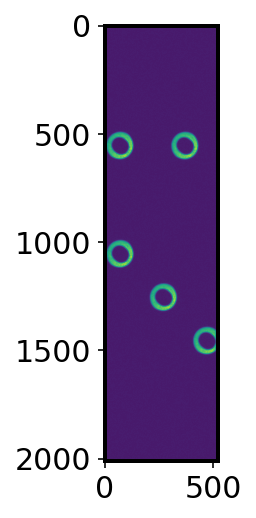

In [36]:
%matplotlib inline

hdul=fits.open('/project/scichris/repackagerTest/input/raw/2000-02-17/3000021700032/3000021700032-R00-SW0-det191.fits')
plt.imshow(hdul[4].data)

## Check out the Ingested BOT files 

In [19]:

# this is the path from DM ticket 
#rawIngestedBOT  = '/project/shared/BOT/_parent/raw/2020-09-06/3020090600371/'

# this is the one with flammarion image from RHL : 
# the last two digits are the seqNum  = 32 (eg in Pinholes.ipynb notebook) 
rawIngestedBOT = '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/'
ingested_BOT_filepaths =  sorted(glob.glob(os.path.join(rawIngestedBOT, f'*SW*')))



NameError: name 'glob' is not defined

In [4]:
ingested_BOT_filepaths

['/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R00-SW0-det191.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R00-SW1-det192.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R04-SW0-det195.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R04-SW1-det196.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R40-SW0-det199.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R40-SW1-det200.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R44-SW0-det203.fits',
 '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/3020082500032-R44-SW1-det204.fits']

In [7]:
fn = ingested_BOT_filepaths[0]
hdul = fits.open(fn)

In [8]:
len(hdul)

10

In [12]:
hdul[0].header['RUNNUM']

'12526'

In [10]:
hdul[1].header

XTENSION= 'IMAGE   '           / marks beginning of new HDU                     
BITPIX  =                   32 / bits per data value                            
NAXIS   =                    2 / number of axis                                 
NAXIS1  =                  576 / size of the n'th axis                          
NAXIS2  =                 2048 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
CHECKSUM= '0rA51o640oA40o54'   / checksum for the current HDU                   
CHANNEL =                    1                                                  
EXTNAME = 'Segment10'                                                           
CCDSUM  = '1 1     '                                                            
DATASEC = '[4:512,1:2000]'                                                      
DETSEC  = '[509:1,1:2000]'  

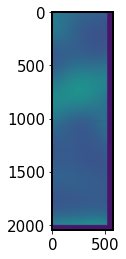

In [16]:
plt.imshow(hdul[6].data)

In [14]:
# try reading in with Butler since these data already got ingested ... 
# the directory that has the requisite files 
# _mapper,  "raw" , "registry.sqlite3" 
# is /project/shared/BOT/_parent
import lsst.daf.persistence as dafPersist
from astropy.utils import data as astropyData
astropyData.clear_download_cache()
repo_dir = "/project/shared/BOT/_parent"
butler = dafPersist.Butler(repo_dir)



In [20]:
butler.getKeys


<bound method Butler.getKeys of Butler(datasetTypeAliasDict={}, repos=RepoDataContainer(_inputs=[RepoData(id=140372990431184,repoArgs=RepositoryArgs(root='/project/shared/BOT/_parent', cfgRoot=None, mapper=<class 'lsst.obs.lsst.lsstCamMapper.LsstCamMapper'>, mapperArgs=None, tags=set(), mode='rw', policy=None)cfg=RepositoryCfg(root='/project/shared/BOT/_parent', mapper=<class 'lsst.obs.lsst.lsstCamMapper.LsstCamMapper'>, mapperArgs={}, parents=[], policy=None),cfgOrigin=existing,cfgRoot=/project/shared/BOT/_parent,repo=<lsst.daf.persistence.repository.Repository object at 0x7fab22389090>,parentRepoDatas=[],isV1Repository=True,role=output,parentRegistry=None)], 
_outputs=[RepoData(id=140372990431184,repoArgs=RepositoryArgs(root='/project/shared/BOT/_parent', cfgRoot=None, mapper=<class 'lsst.obs.lsst.lsstCamMapper.LsstCamMapper'>, mapperArgs=None, tags=set(), mode='rw', policy=None)cfg=RepositoryCfg(root='/project/shared/BOT/_parent', mapper=<class 'lsst.obs.lsst.lsstCamMapper.LsstCamMa

In [20]:
#'visit': obsId, 'filter': 'g', 'raftName': raft, 
#                   'detectorName': detector, 'detector': detNum

# this query shows what data is available for that particular dataId constraint...
#2020-08-25/3020082500032 <-- flammarion
butler.queryMetadata(datasetType='raw', format=['visit', 'filter', 'raftName', 
                                               'detectorName', 'detector'],dataId={'visit':3020082500032})



[(3020082500032, 'ND_OD1.0', 'R01', 'S00', 0),
 (3020082500032, 'ND_OD1.0', 'R01', 'S01', 1),
 (3020082500032, 'ND_OD1.0', 'R01', 'S02', 2),
 (3020082500032, 'ND_OD1.0', 'R01', 'S10', 3),
 (3020082500032, 'ND_OD1.0', 'R01', 'S11', 4),
 (3020082500032, 'ND_OD1.0', 'R01', 'S12', 5),
 (3020082500032, 'ND_OD1.0', 'R01', 'S20', 6),
 (3020082500032, 'ND_OD1.0', 'R01', 'S21', 7),
 (3020082500032, 'ND_OD1.0', 'R01', 'S22', 8),
 (3020082500032, 'ND_OD1.0', 'R02', 'S00', 9),
 (3020082500032, 'ND_OD1.0', 'R02', 'S01', 10),
 (3020082500032, 'ND_OD1.0', 'R02', 'S02', 11),
 (3020082500032, 'ND_OD1.0', 'R02', 'S10', 12),
 (3020082500032, 'ND_OD1.0', 'R02', 'S11', 13),
 (3020082500032, 'ND_OD1.0', 'R02', 'S12', 14),
 (3020082500032, 'ND_OD1.0', 'R02', 'S20', 15),
 (3020082500032, 'ND_OD1.0', 'R02', 'S21', 16),
 (3020082500032, 'ND_OD1.0', 'R02', 'S22', 17),
 (3020082500032, 'ND_OD1.0', 'R03', 'S00', 18),
 (3020082500032, 'ND_OD1.0', 'R03', 'S01', 19),
 (3020082500032, 'ND_OD1.0', 'R03', 'S02', 20),
 (

In [21]:
data_id={'visit':3020082500032, 'raftName':'R04', 'detectorName':'SW0'}
post = butler.get('raw', **data_id)


MC_C_20200825_000032 R04_SW0: No FILTER key found but FILTER2="ND_OD1.0" (removed)


In [22]:
# this basically prints the FITS header keywords....
# print(post.getMetadata())
image = post.getImage()



In [23]:
# IMPORT PLOTTING MODULES
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18
import numpy as np 
fig,ax = plt.subplots(1,1,figsize=(5,10))
plt.imshow(np.log10(image.array.T))



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [52]:
image.

lsst.afw.image.image.image.ImageF=[[14737. 14743. 14744. ... 18781. 18774. 14930.]
 [14727. 14740. 14736. ... 18775. 18789. 14930.]
 [14741. 14730. 14724. ... 18791. 18780. 14932.]
 ...
 [14724. 14731. 14729. ... 18786. 18785. 14929.]
 [14731. 14717. 14732. ... 18781. 18783. 14930.]
 [14710. 14692. 14691. ... 18473. 18349. 14928.]], bbox=(minimum=(0, 0), maximum=(4607, 2047))